In [144]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
from scipy.interpolate import BSpline
from cmdstanpy import CmdStanModel
import arviz as az
import pandas as pd
from glob import glob
from sklearn import preprocessing

plt.style.context("seaborn-white")
mpl.rcParams["figure.dpi"] = 200


LIGHT = "#B3FFFF"  # 179, 255, 255,
LIGHT_HIGHLIGHT = "#9AF6FF"  # 154, 246,255
MID = "#67C3FF"  # 103,195,255
MID_HIGHLIGHT = "#3490CC"  # 52,144,204
DARK = "#015D99"  # 1,93,153
DARK_HIGHLIGHT = "#002A66"  # 0,42,102
GREEN = "#00FF00"  # RGB
LIGHT_GREY = "#DDDDDD"  # RGB


In [145]:
def load_signals (files):
    signals  = np.zeros((len(files),), dtype = object)
    for index,i in enumerate(files):
        file = np.loadtxt(i, dtype = 'str' , unpack = True)
        file = np.char.replace(file,',','.')
        file = file.astype(np.float64)
        signals[index] = file
    return signals

In [146]:
files_healthy = glob('data_2/p0_*.*')
files_damaged_1 = glob('data_2/p1_*.*')
files_damaged_2 = glob('data_2/p2_*.*')
files_damaged_ring = glob('data_2/pi_*.*')

signals_healthy = load_signals(files_healthy)
signals_damaged_1 = load_signals(files_damaged_1)
signals_damaged_2 = load_signals(files_damaged_2)
signals_damaged_ring = load_signals(files_damaged_ring)

In [147]:
signals_healthy_x = np.zeros((7,), dtype = object)
signals_healthy_y = np.zeros((7,), dtype = object)
for i in range(7):
    a = pd.read_csv('processed_data2/signals_healthy_{}.csv'.format(i)) 
    signals_healthy_y[i] = a.to_numpy()[0].astype(float)
    signals_healthy_x[i] = a.to_numpy()[1].astype(float)

signals_damaged_1_y = np.zeros((7,), dtype = object)
signals_damaged_1_x = np.zeros((7,), dtype = object)
for i in range(7):
    a = pd.read_csv('processed_data2/signals_damaged_1_{}.csv'.format(i)) 
    signals_damaged_1_y[i] = a.to_numpy()[0].astype(float)
    signals_damaged_1_x[i] = a.to_numpy()[1].astype(float)

signals_damaged_2_y = np.zeros((7,), dtype = object)
signals_damaged_2_x = np.zeros((7,), dtype = object)
for i in range(7):
    a = pd.read_csv('processed_data2/signals_damaged_2_{}.csv'.format(i)) 
    signals_damaged_2_y[i] = a.to_numpy()[0].astype(float)
    signals_damaged_2_x[i] = a.to_numpy()[1].astype(float)

signals_damaged_ring_y = np.zeros((7,), dtype = object)
signals_damaged_ring_x = np.zeros((7,), dtype = object)
for i in range(7):
    a = pd.read_csv('processed_data2/signals_damaged_ring_{}.csv'.format(i)) 
    signals_damaged_ring_y[i] = a.to_numpy()[0].astype(float)
    signals_damaged_ring_x[i] = a.to_numpy()[1].astype(float)

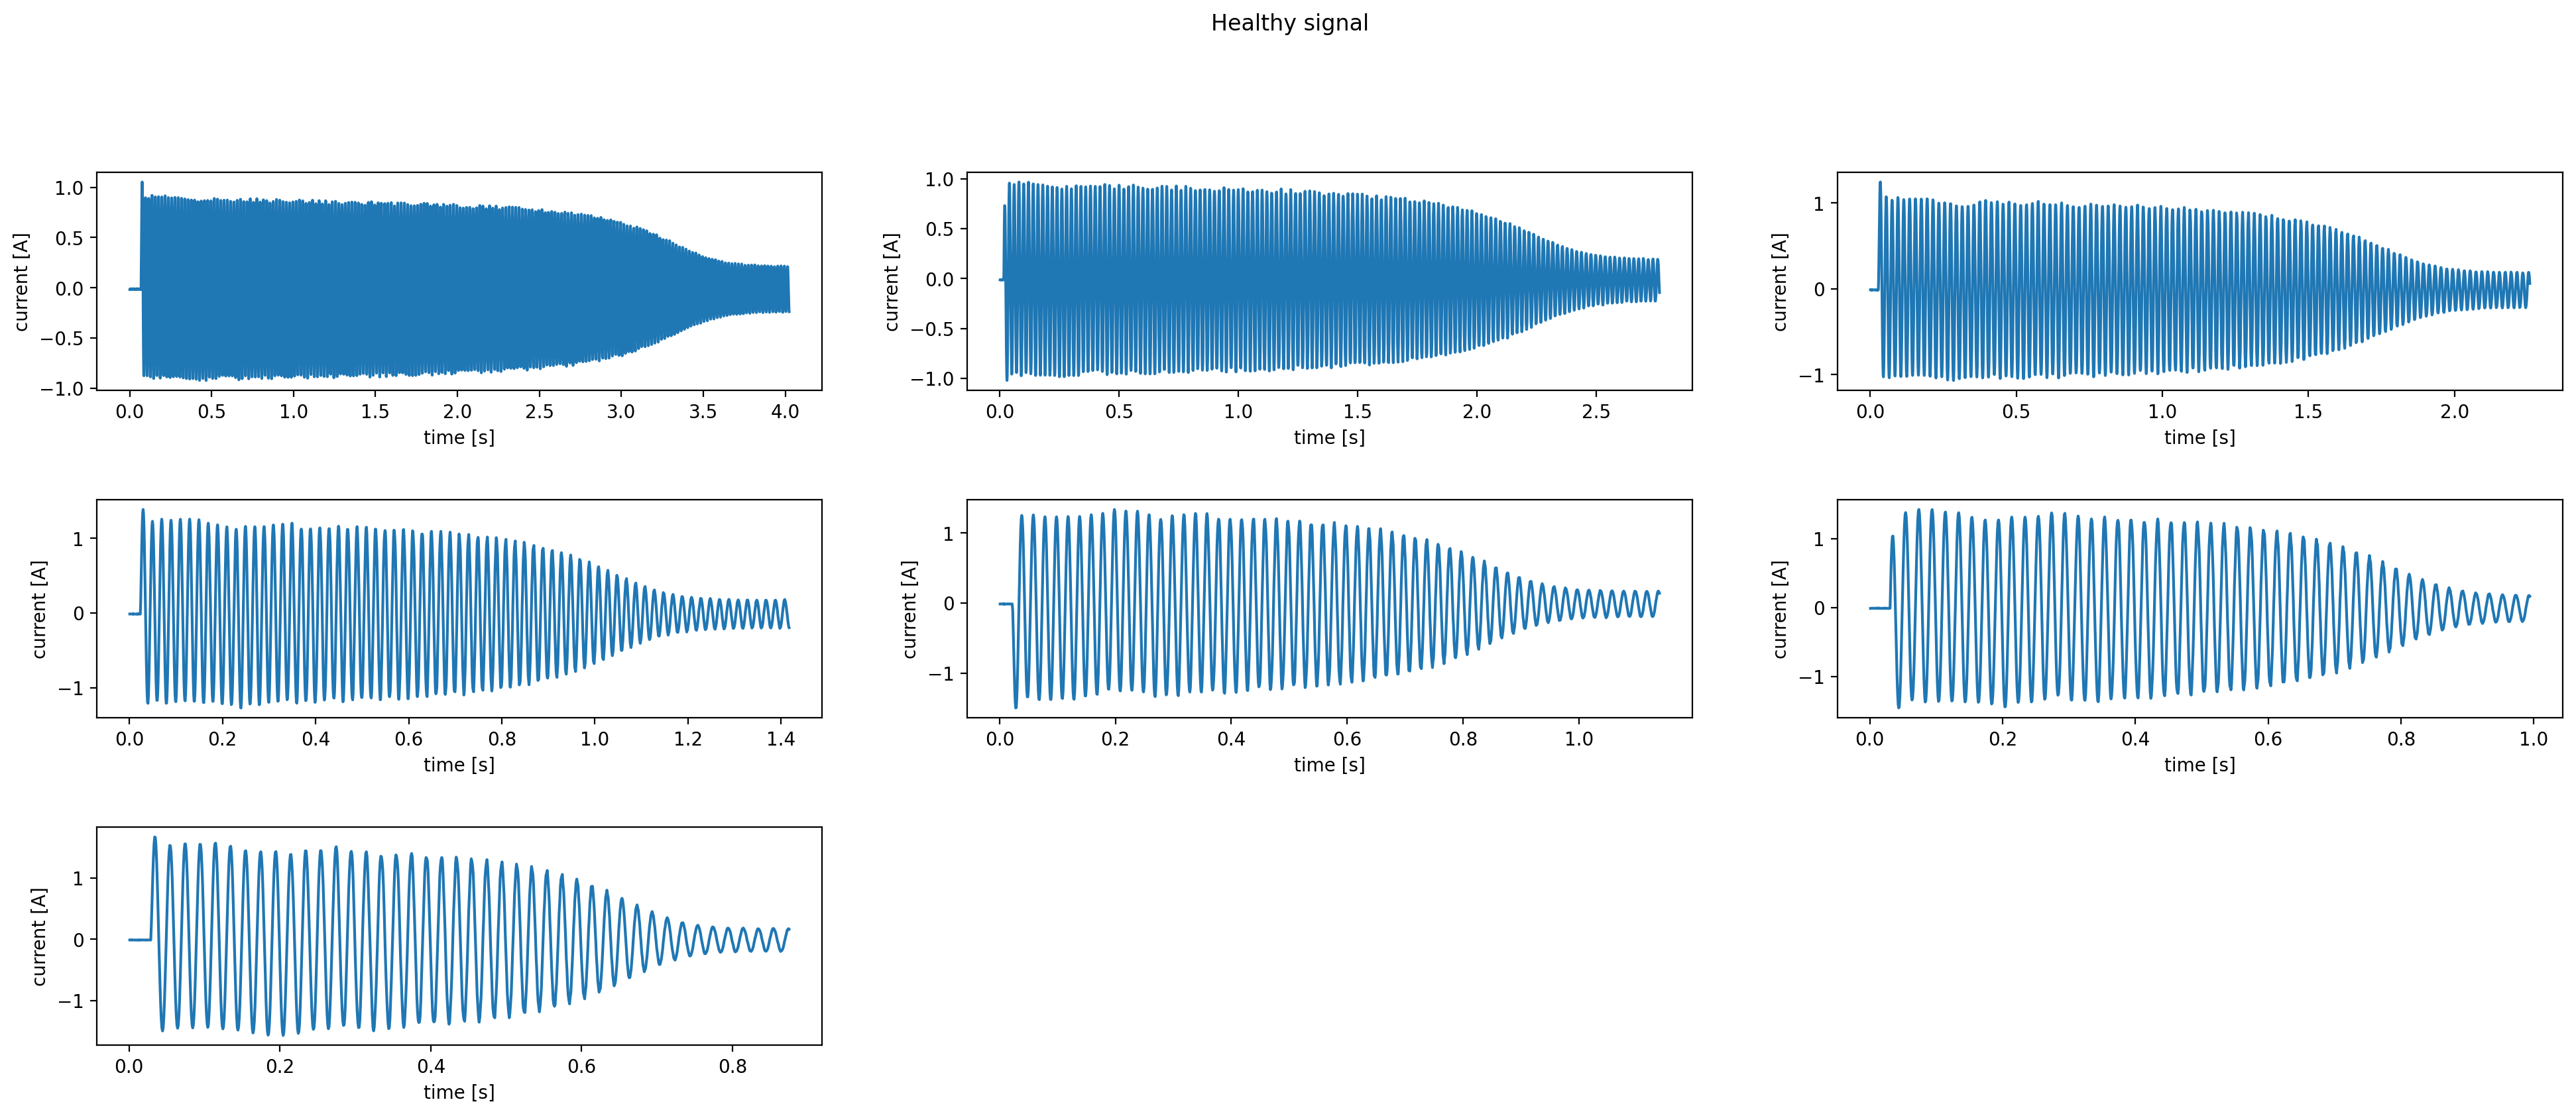

In [151]:
plt.figure(figsize=  (24,12))
plt.suptitle('Healthy signal')
plt.subplots_adjust(hspace=0.5)

for index,signal in enumerate(signals_healthy):
    ax = plt.subplot(4,3,index +1)
    ax.plot(signal[0],signal[1])
    ax.set_xlabel('time [s]')
    ax.set_ylabel('current [A]')

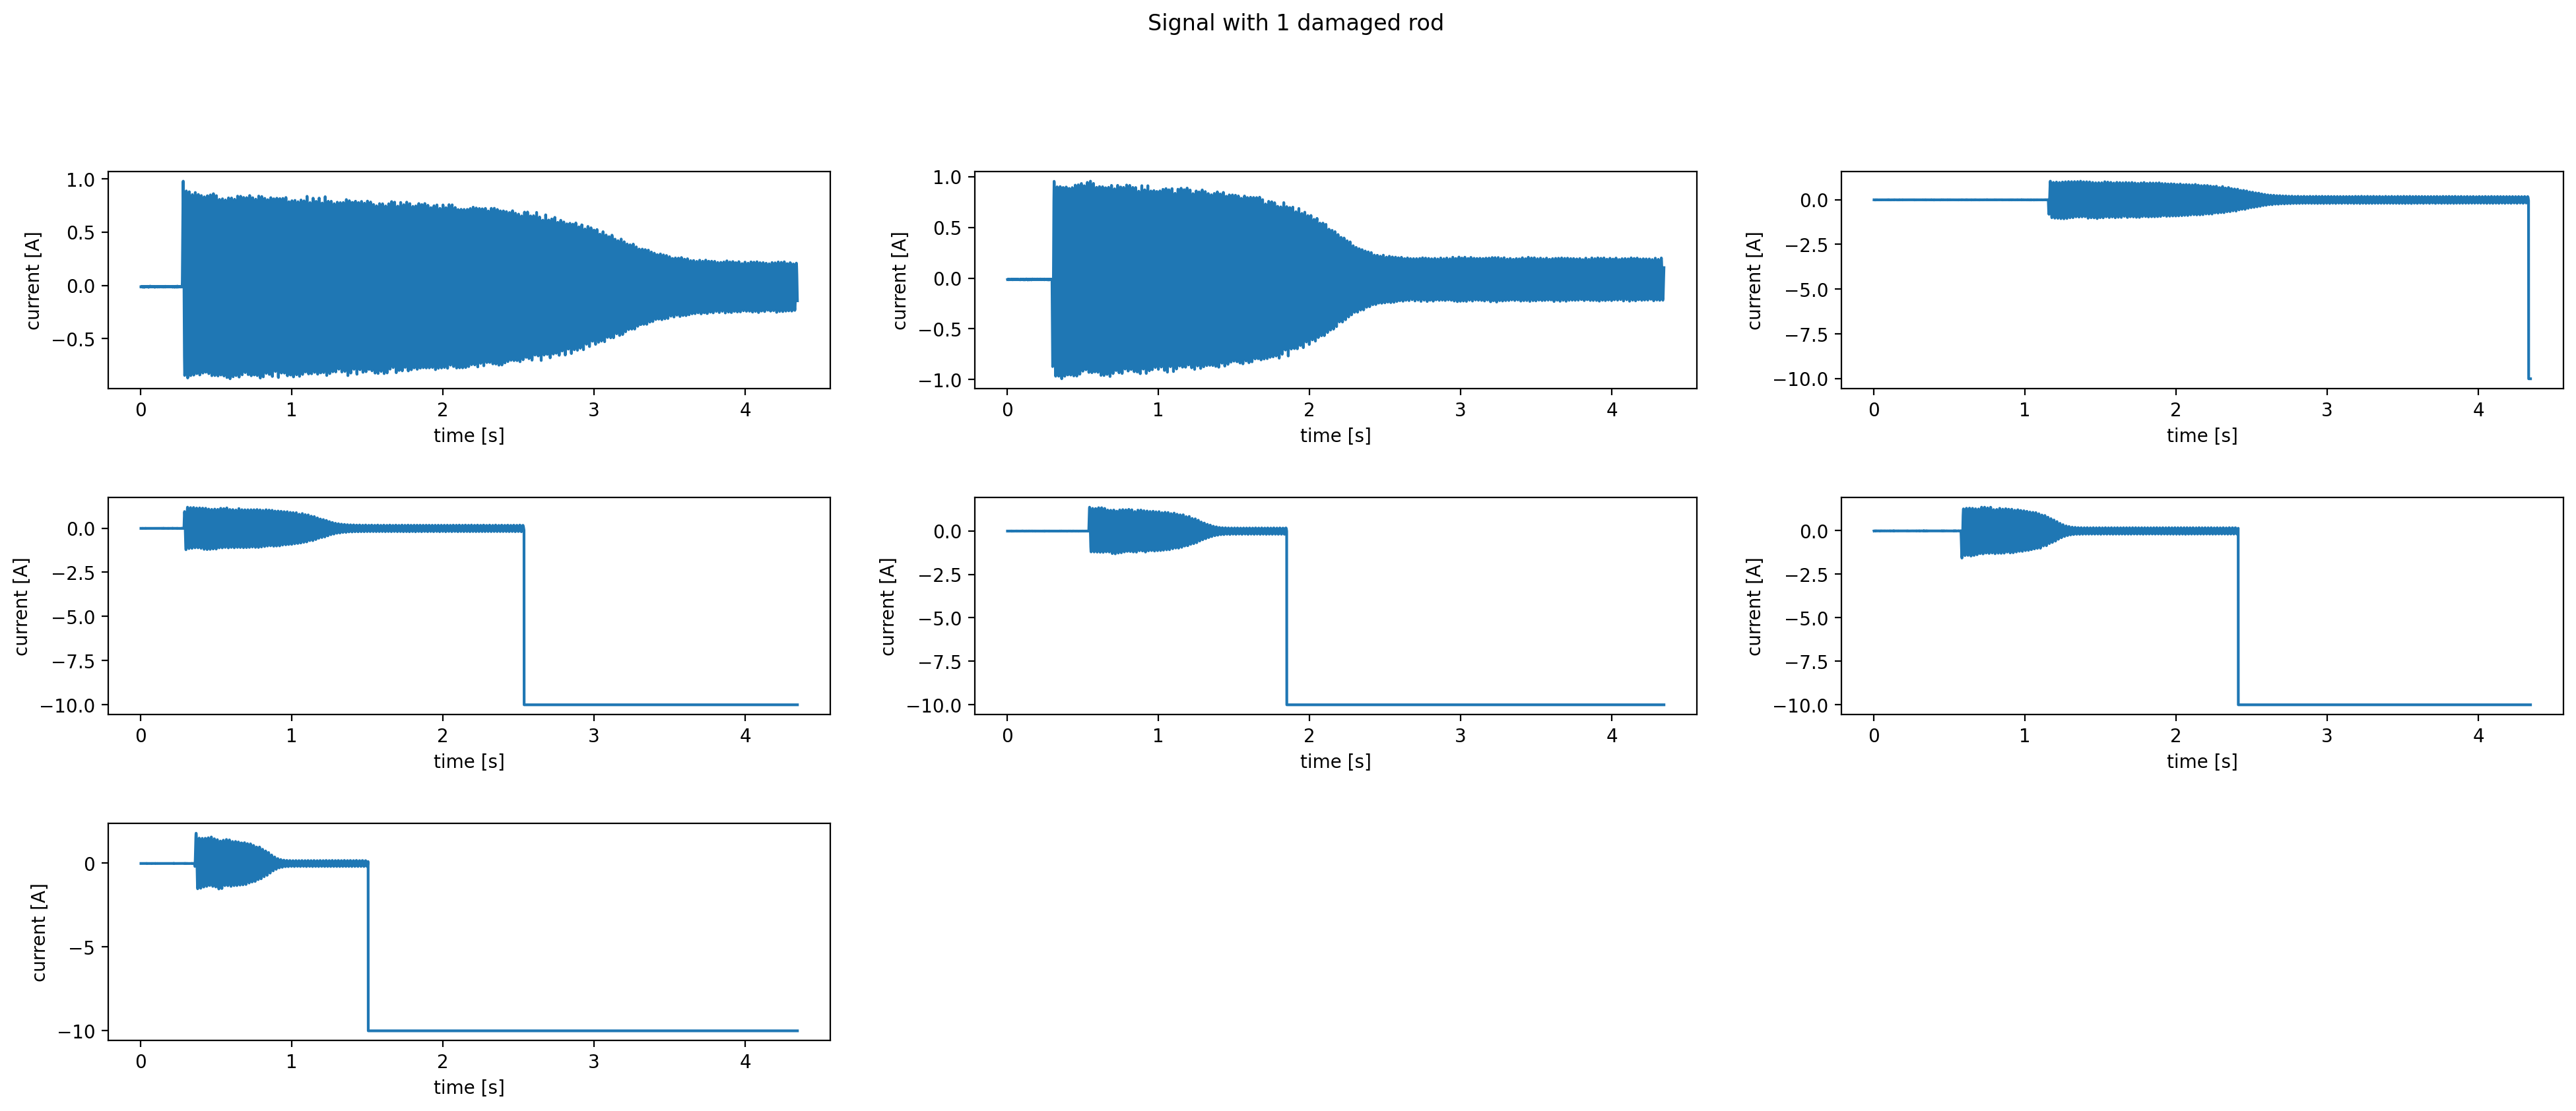

In [152]:
plt.figure(figsize=  (24,12))
plt.suptitle('Signal with 1 damaged rod')
plt.subplots_adjust(hspace=0.5)

for index,signal in enumerate(signals_damaged_1):
    ax = plt.subplot(4,3,index +1)
    ax.plot(signal[0],signal[1])
    ax.set_xlabel('time [s]')
    ax.set_ylabel('current [A]')

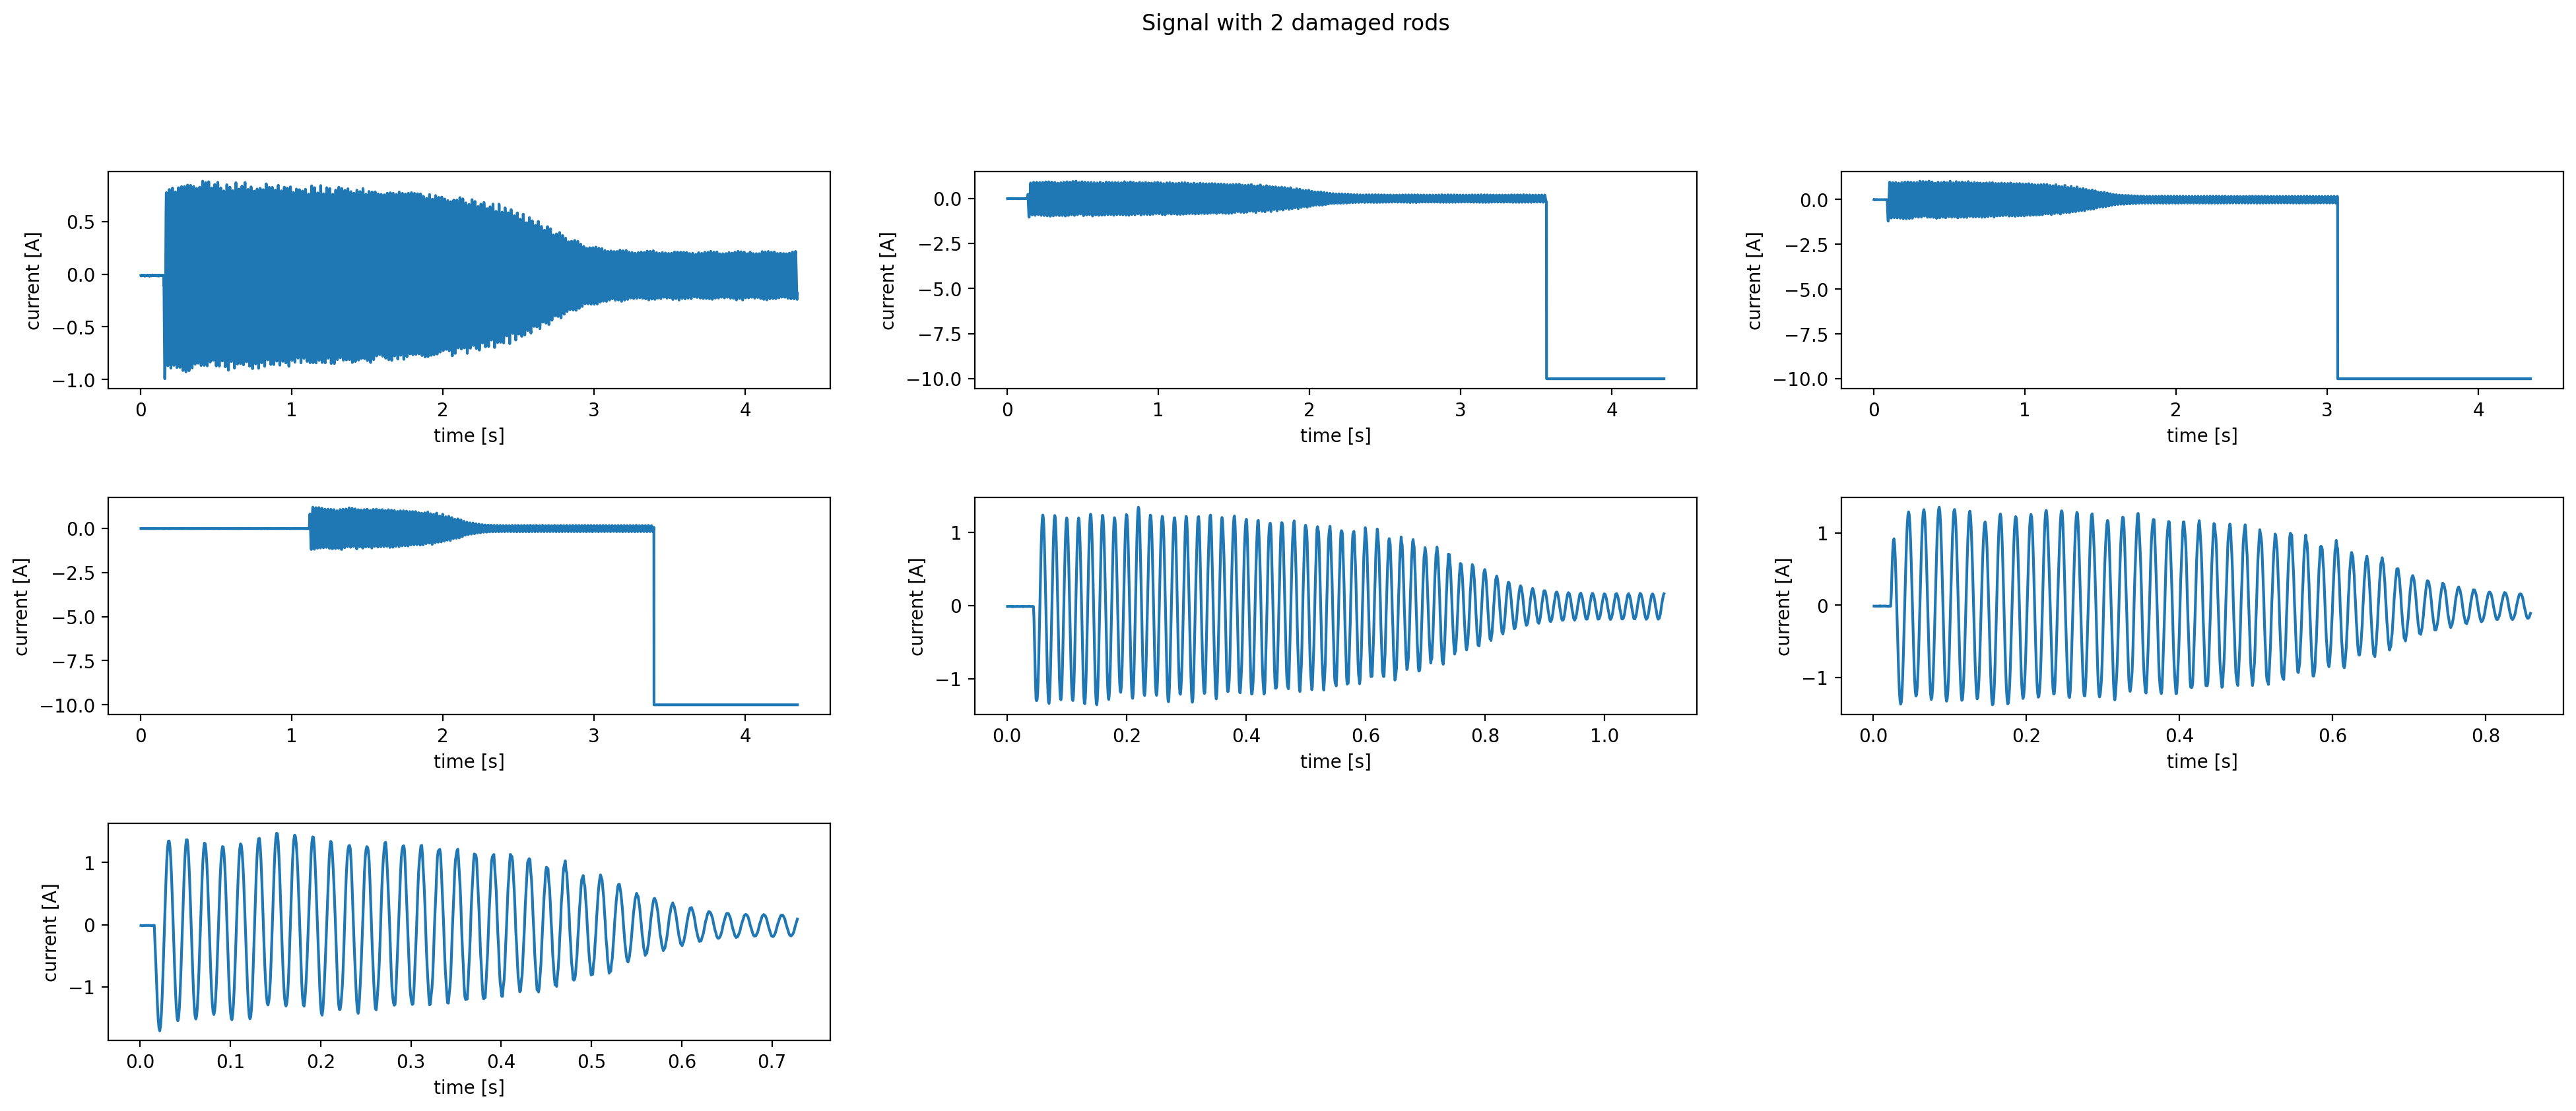

In [153]:
plt.figure(figsize=  (24,12))
plt.suptitle('Signal with 2 damaged rods')
plt.subplots_adjust(hspace=0.5)

for index,signal in enumerate(signals_damaged_2):
    ax = plt.subplot(4,3,index +1)
    ax.plot(signal[0],signal[1])
    ax.set_xlabel('time [s]')
    ax.set_ylabel('current [A]')

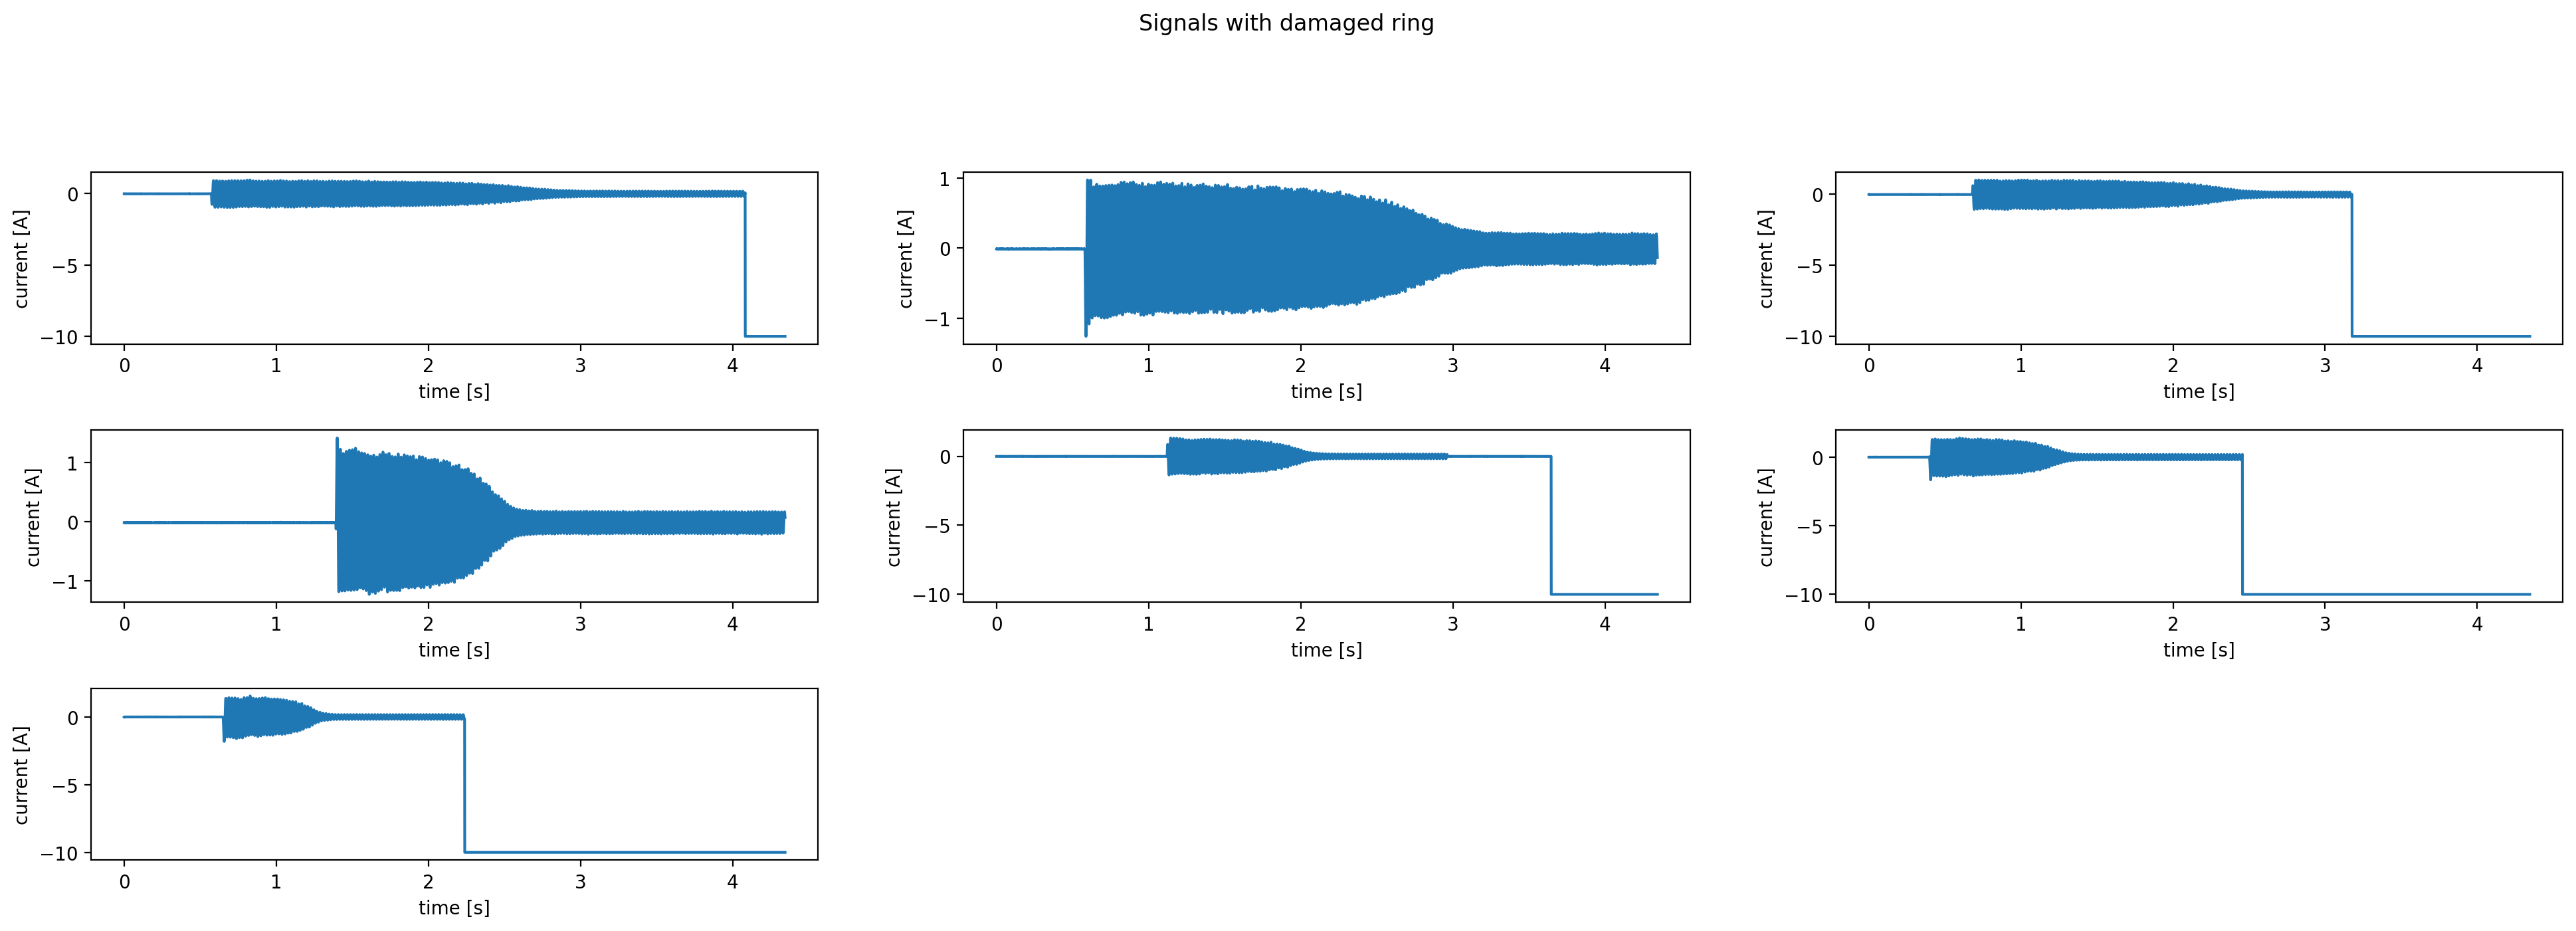

In [154]:
plt.figure(figsize=  (24,12))
plt.suptitle('Signals with damaged ring')
plt.subplots_adjust(hspace=0.5)

for index,signal in enumerate(signals_damaged_ring):
    ax = plt.subplot(5,3,index +1)
    ax.plot(signal[0],signal[1])
    ax.set_xlabel('time [s]')
    ax.set_ylabel('current [A]')


MOVING RMS

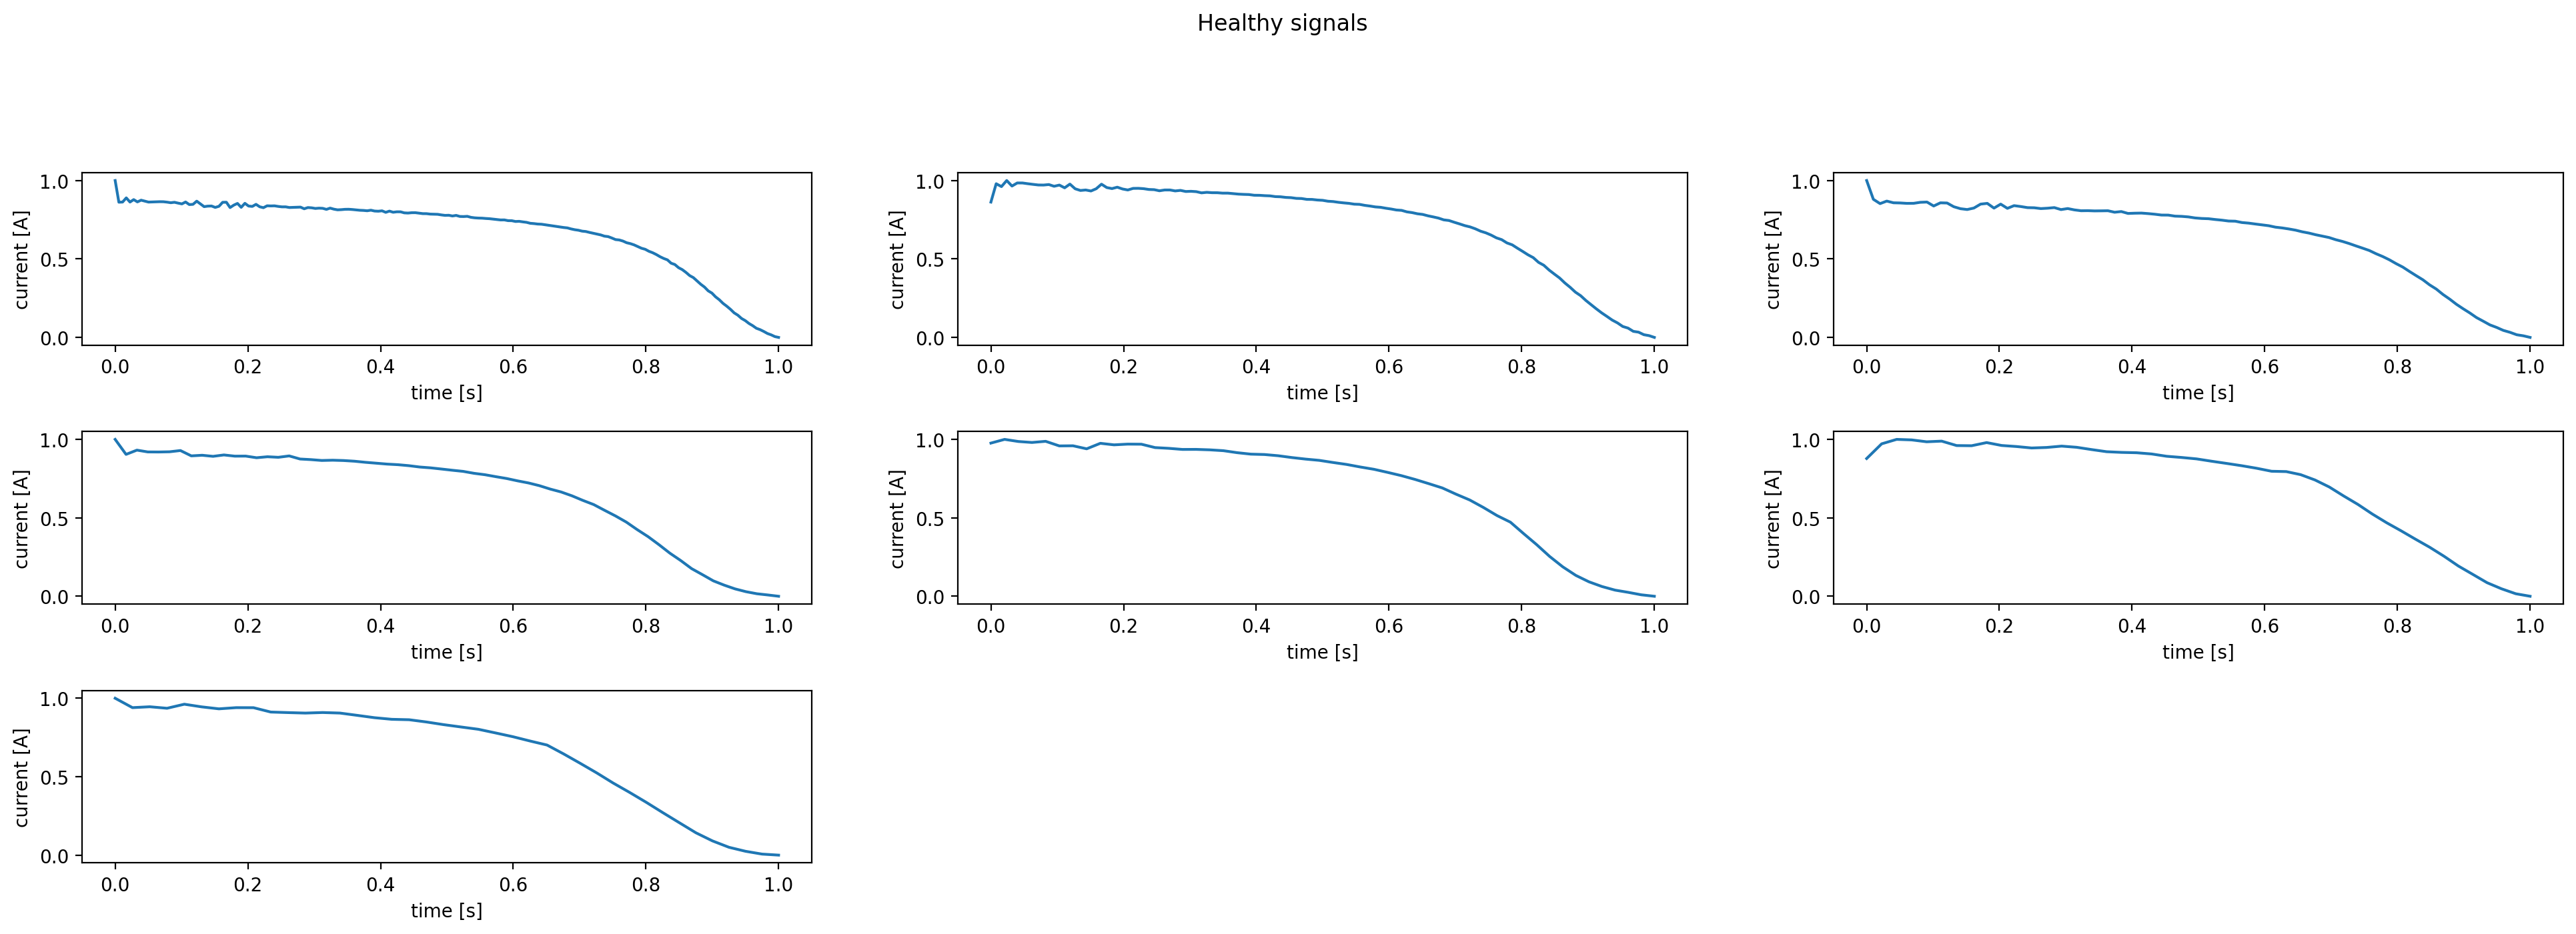

In [155]:
plt.figure(figsize=  (24,12))
plt.suptitle('Healthy signals')
plt.subplots_adjust(hspace=0.5)
for index in range(len(signals_healthy_x)):
    ax = plt.subplot(5,3,index +1)
    ax.plot(signals_healthy_x[index],signals_healthy_y[index])
    ax.set_xlabel('time [s]')
    ax.set_ylabel('current [A]')



In [156]:
signals_healthy_x[1]

array([0.        , 0.00793651, 0.01587302, 0.02380952, 0.03174603,
       0.03968254, 0.04761905, 0.05555556, 0.06349206, 0.07142857,
       0.07936508, 0.08730159, 0.0952381 , 0.1031746 , 0.11111111,
       0.11904762, 0.12698413, 0.13492063, 0.14285714, 0.15079365,
       0.15873016, 0.16666667, 0.17460317, 0.18253968, 0.19047619,
       0.1984127 , 0.20634921, 0.21428571, 0.22222222, 0.23015873,
       0.23809524, 0.24603175, 0.25396825, 0.26190476, 0.26984127,
       0.27777778, 0.28571429, 0.29365079, 0.3015873 , 0.30952381,
       0.31746032, 0.32539683, 0.33333333, 0.34126984, 0.34920635,
       0.35714286, 0.36507937, 0.37301587, 0.38095238, 0.38888889,
       0.3968254 , 0.4047619 , 0.41269841, 0.42063492, 0.42857143,
       0.43650794, 0.44444444, 0.45238095, 0.46031746, 0.46825397,
       0.47619048, 0.48412698, 0.49206349, 0.5       , 0.50793651,
       0.51587302, 0.52380952, 0.53174603, 0.53968254, 0.54761905,
       0.55555556, 0.56349206, 0.57142857, 0.57936508, 0.58730

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


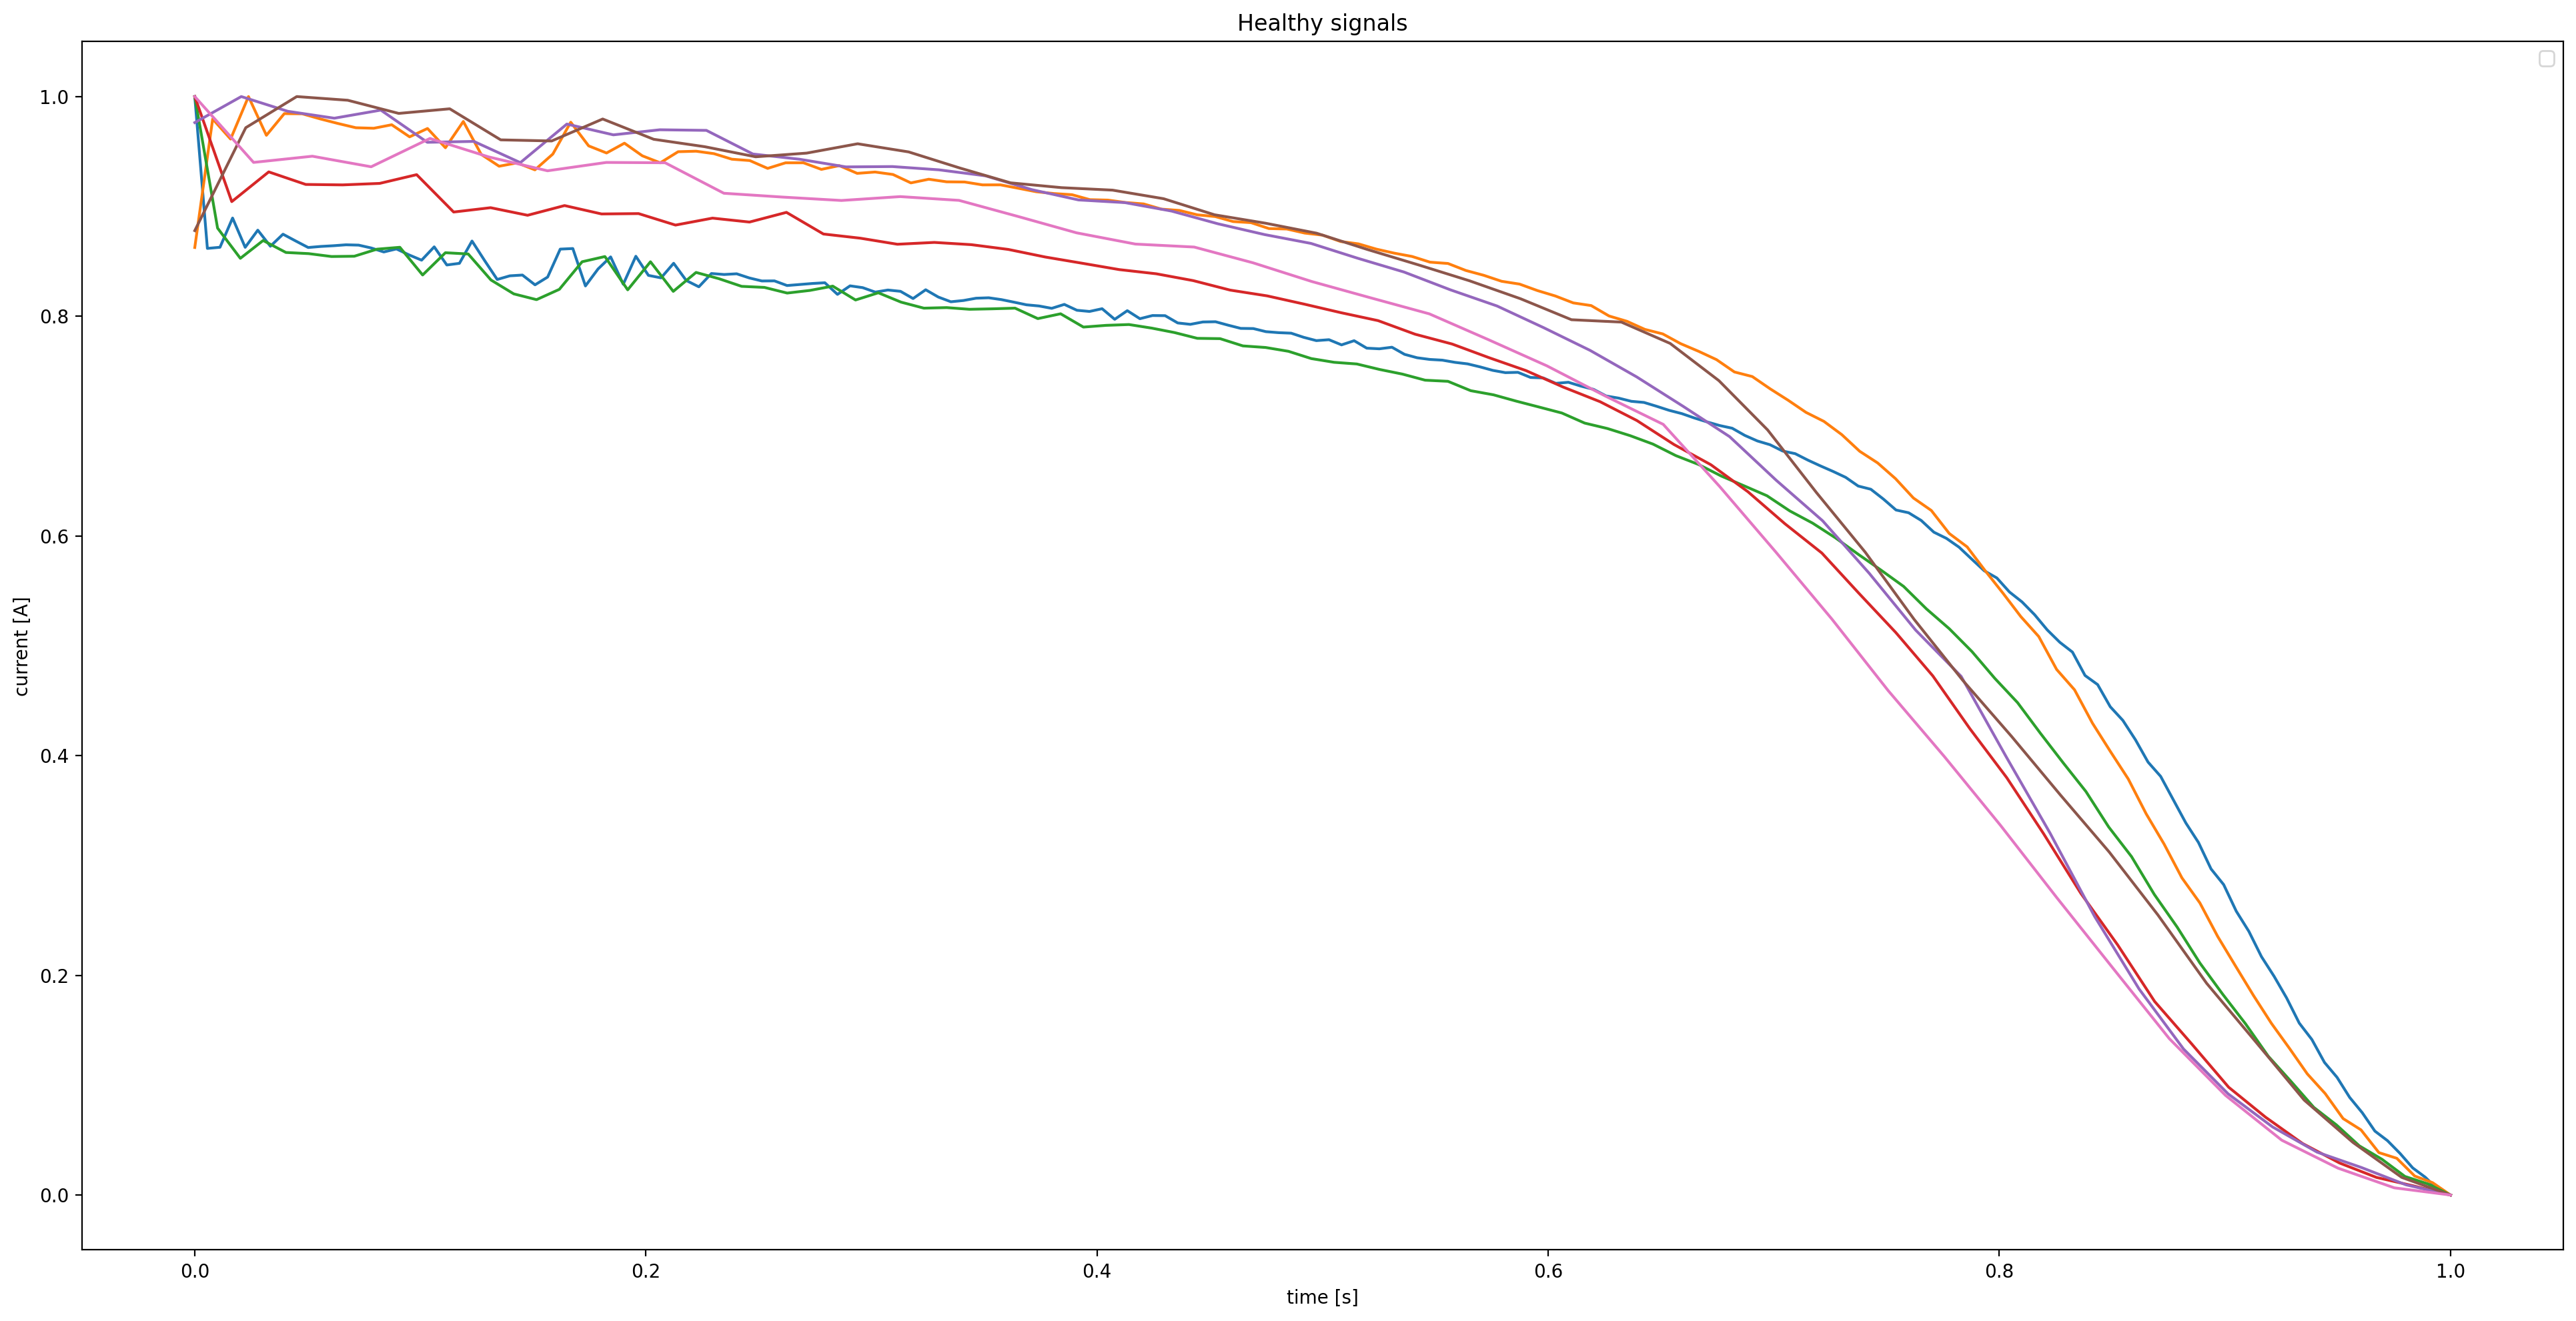

In [157]:
plt.figure(figsize=  (24,12))
plt.title('Healthy signals')
for index in range(len(signals_healthy_x)):
    plt.plot(signals_healthy_x[index],signals_healthy_y[index])
    plt.xlabel('time [s]')
    plt.ylabel('current [A]')
plt.legend()

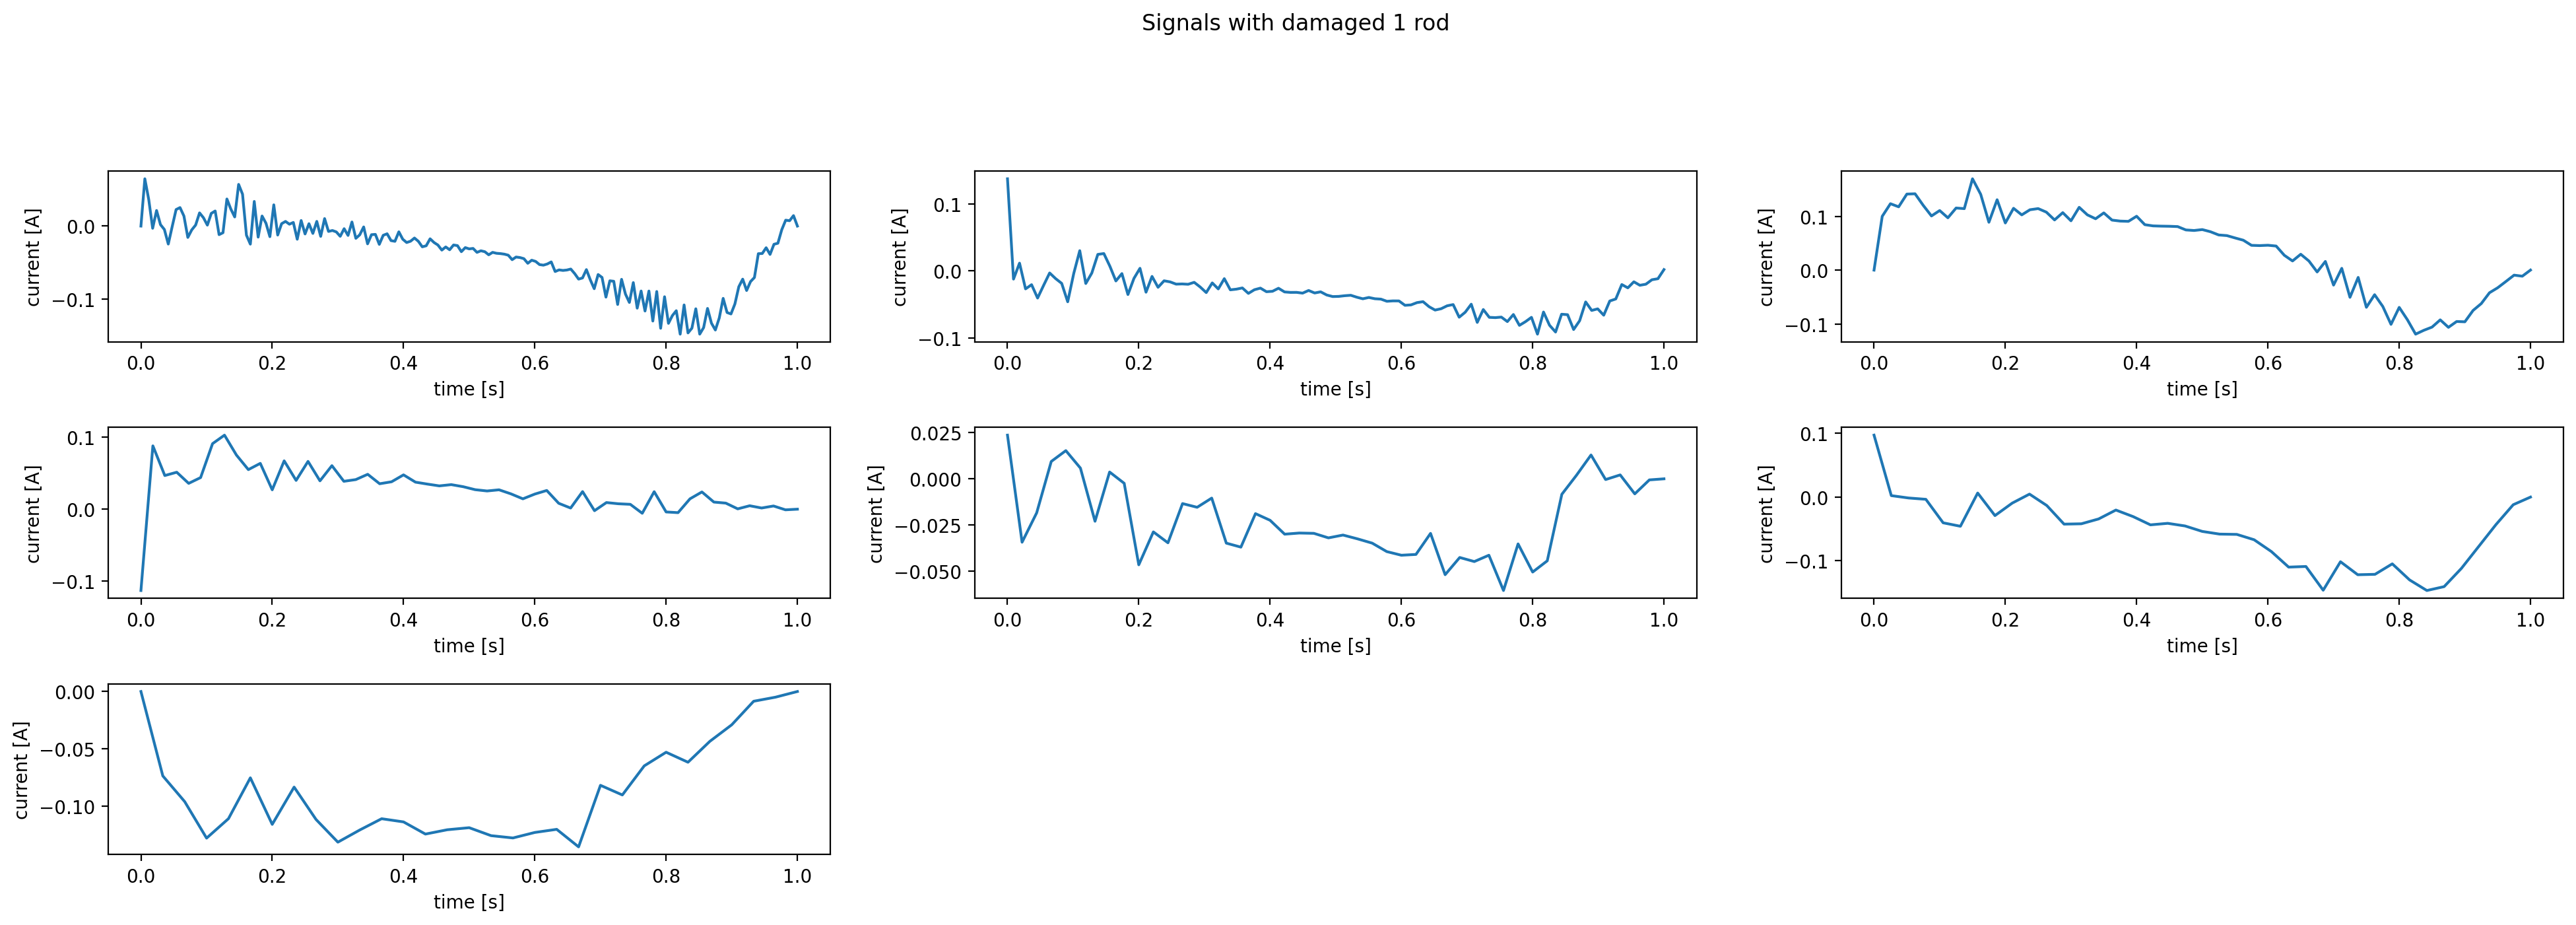

In [158]:
plt.figure(figsize=  (24,12))
plt.suptitle('Signals with damaged 1 rod')
plt.subplots_adjust(hspace=0.5)
for index in range(len(signals_damaged_1_x)):
    ax = plt.subplot(5,3,index +1)
    ax.plot(signals_damaged_1_x[index],signals_damaged_1_y[index])
    ax.set_xlabel('time [s]')
    ax.set_ylabel('current [A]')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


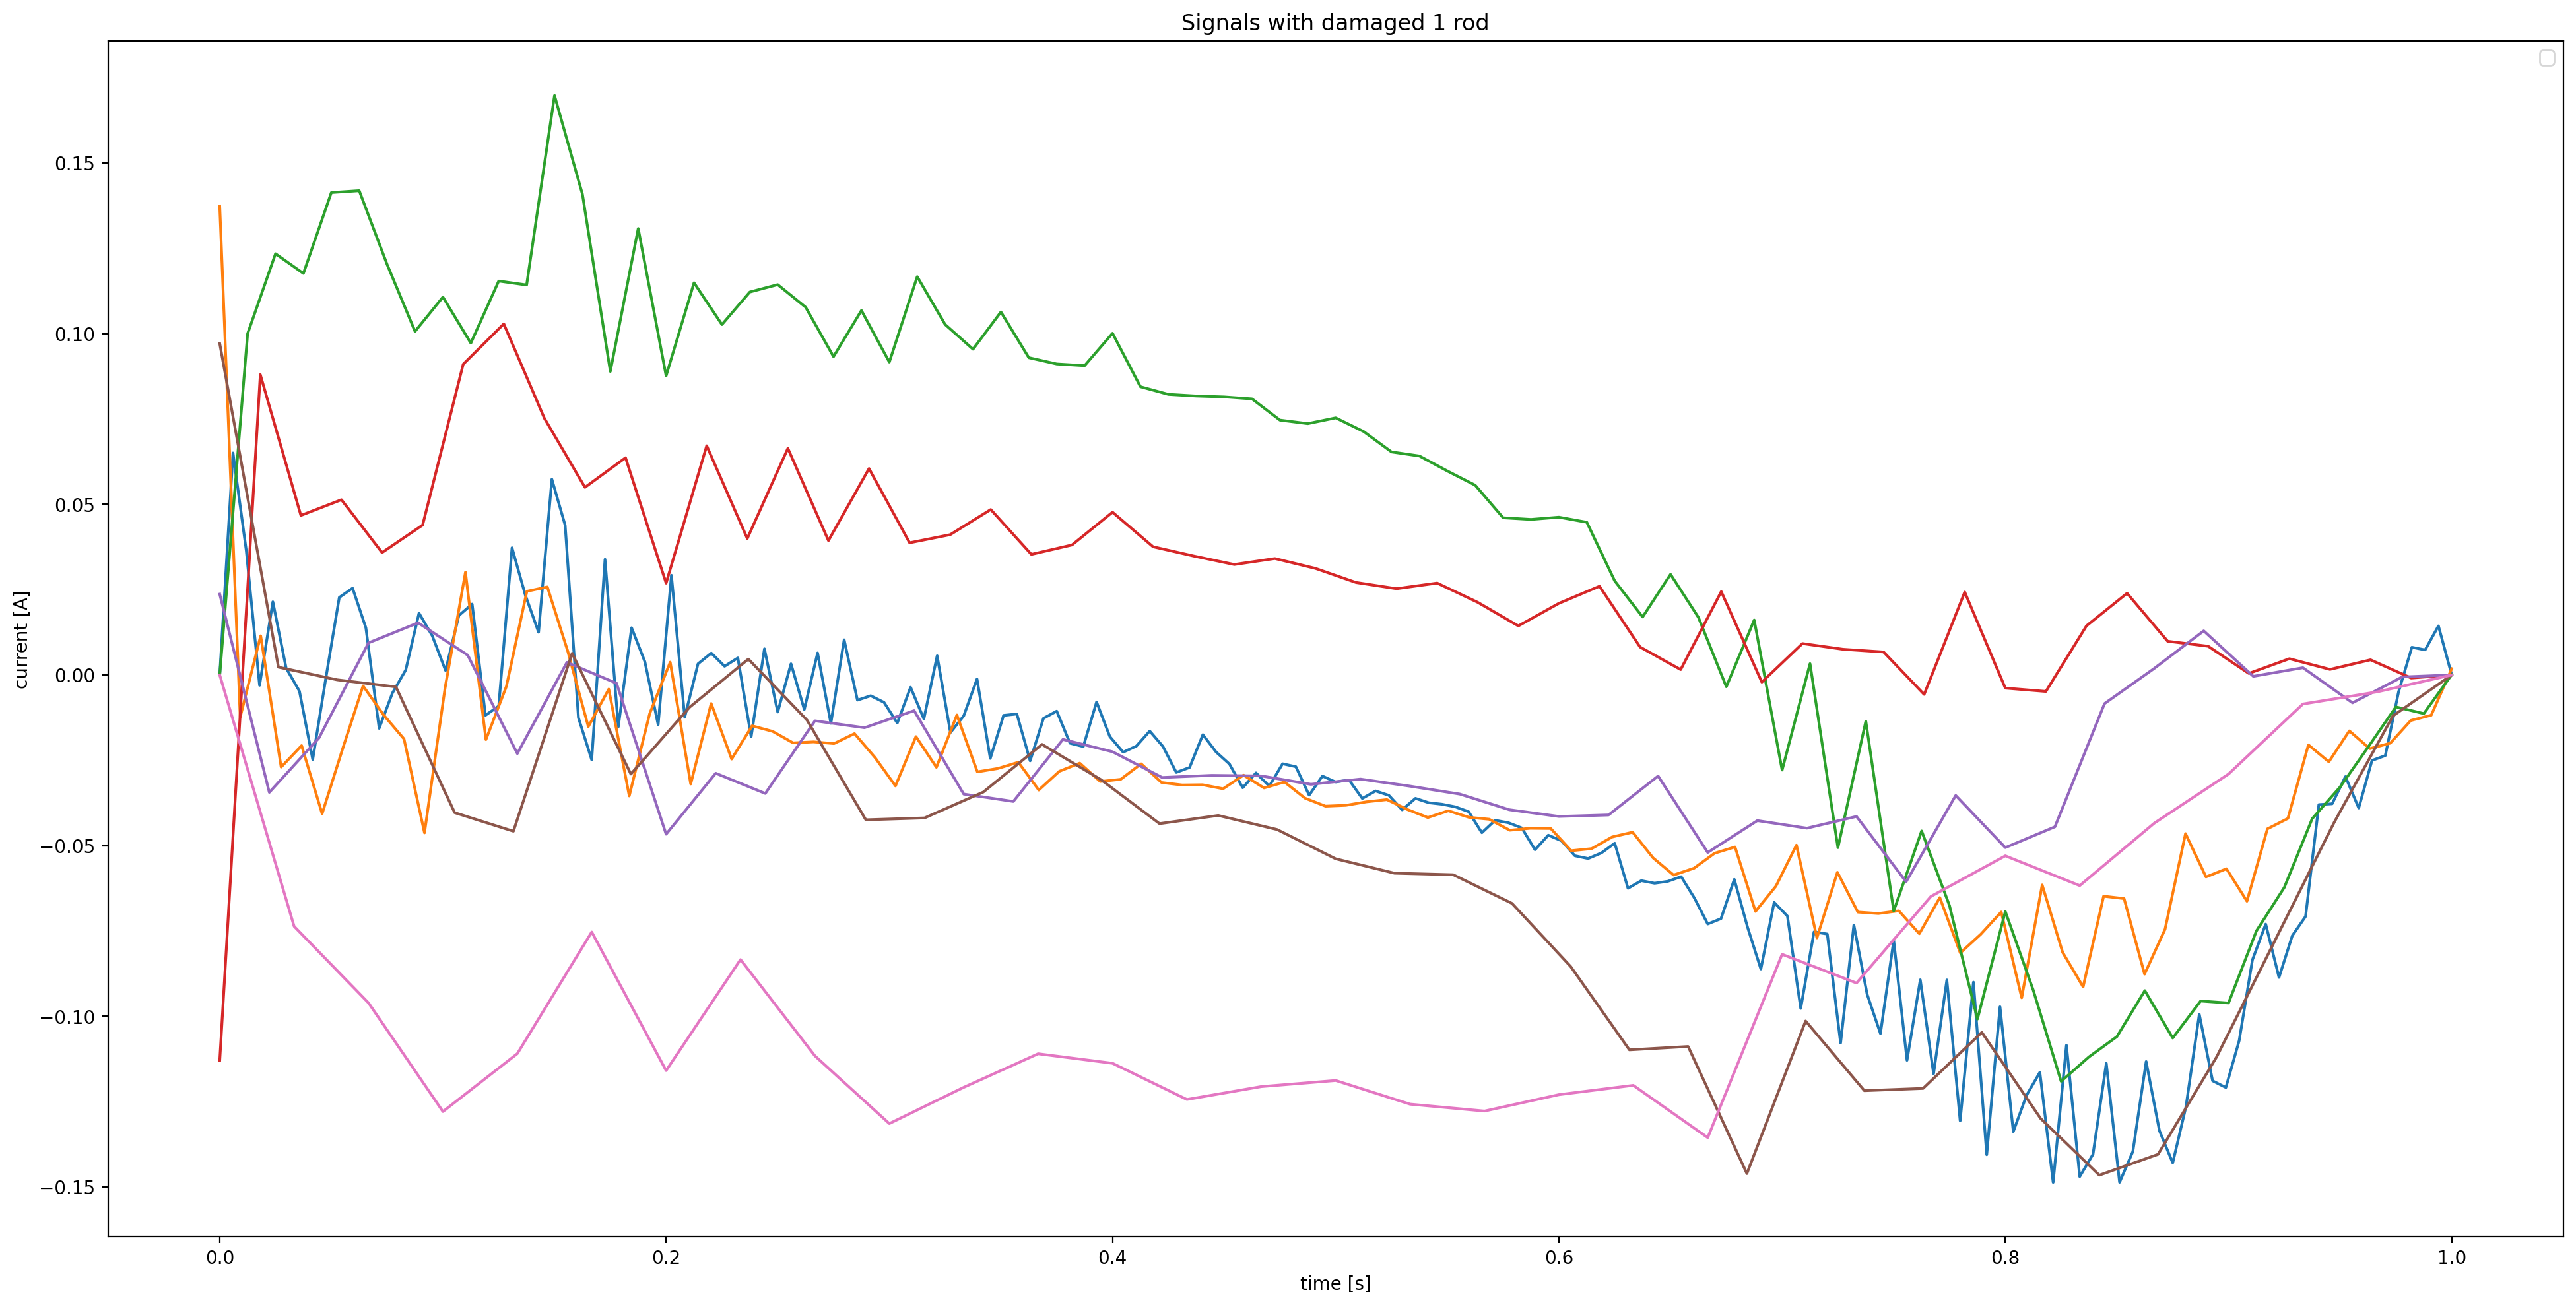

In [159]:
plt.figure(figsize=  (24,12))
plt.title('Signals with damaged 1 rod')
for index in range(len(signals_damaged_1)):
    plt.plot(signals_damaged_1_x[index],signals_damaged_1_y[index])
    plt.xlabel('time [s]')
    plt.ylabel('current [A]')
plt.legend()

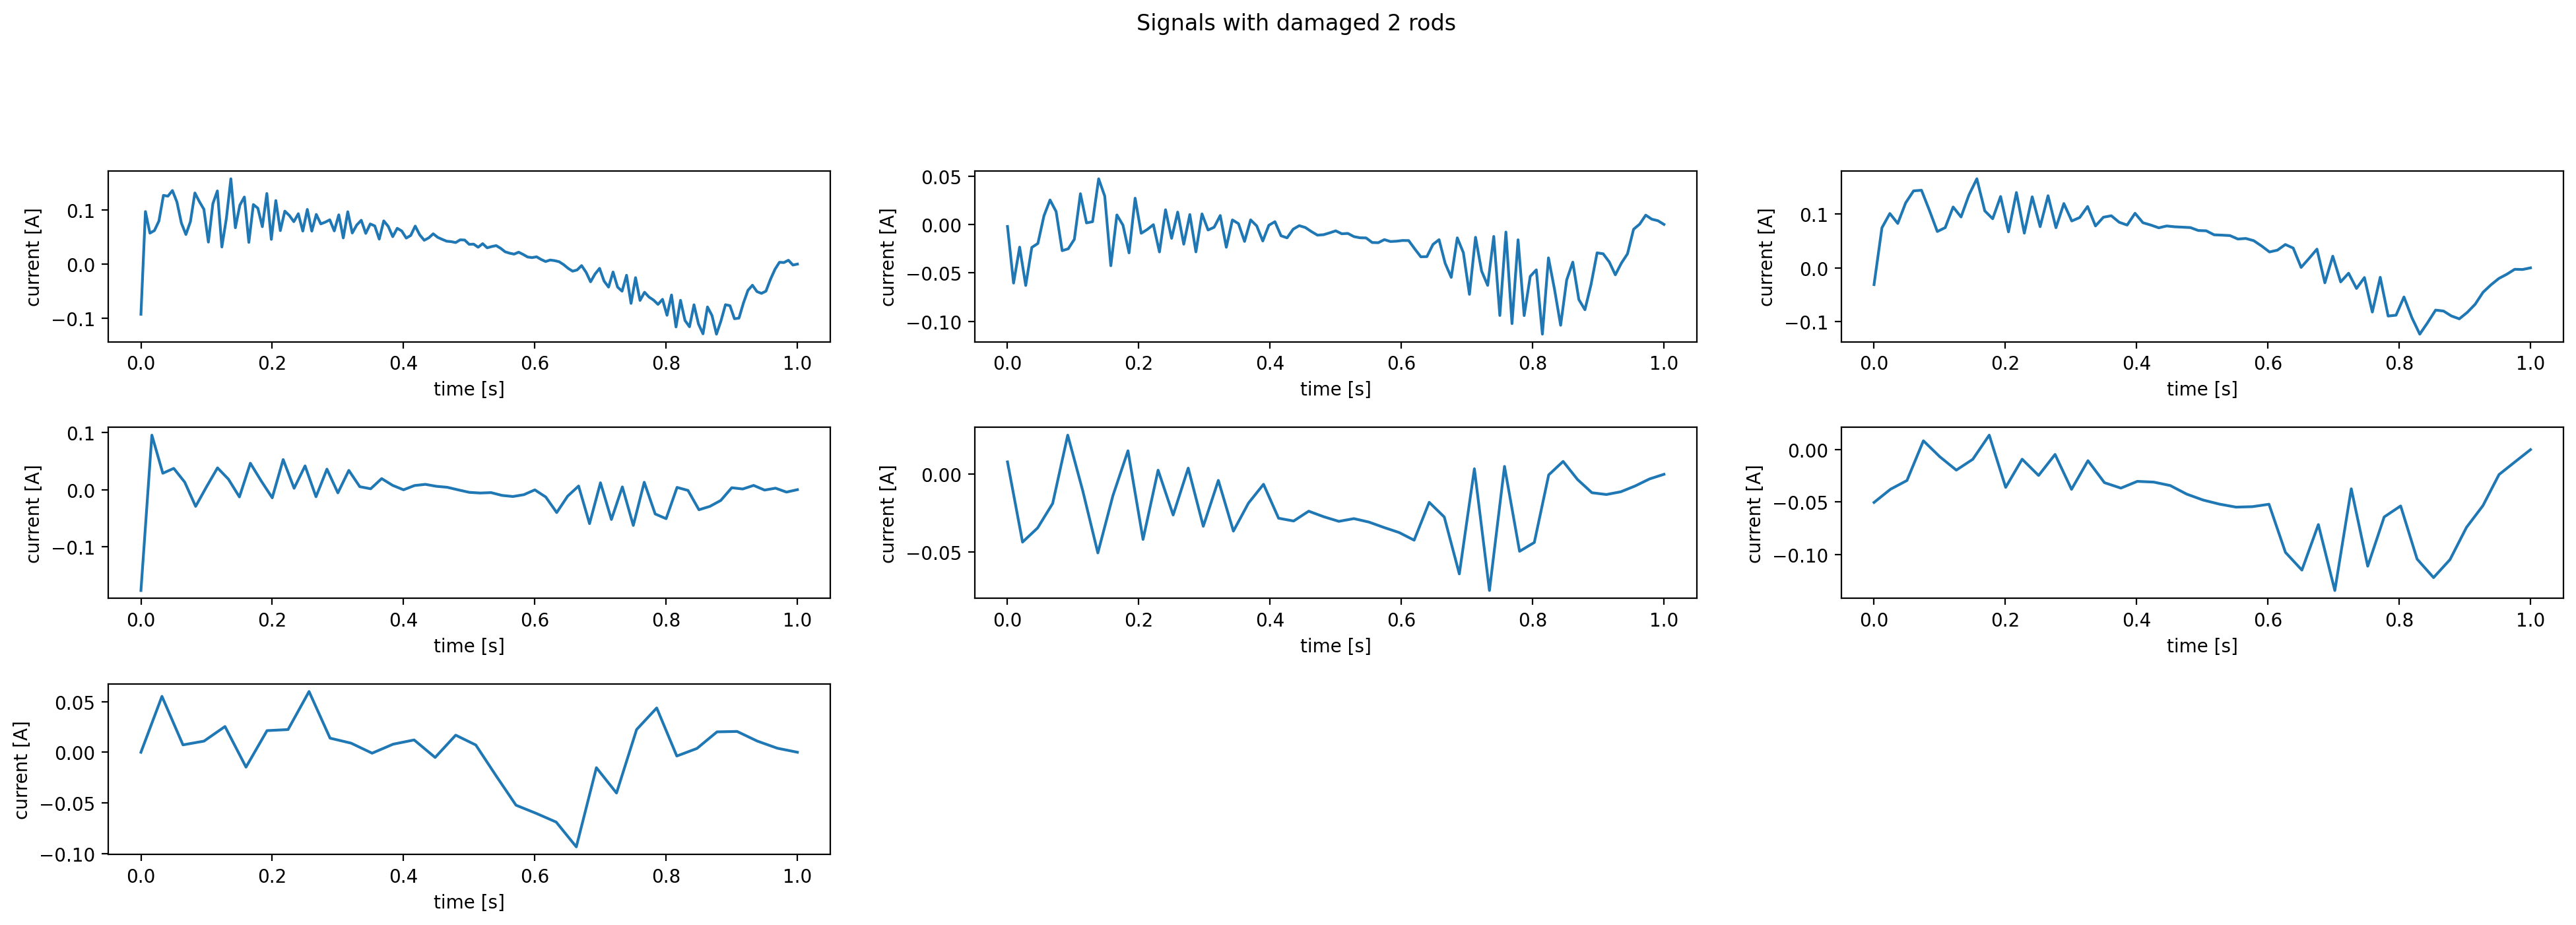

In [160]:
plt.figure(figsize=  (24,12))
plt.suptitle('Signals with damaged 2 rods')
plt.subplots_adjust(hspace=0.5)
for index in range(len(signals_damaged_2_x)):
    ax = plt.subplot(5,3,index +1)
    ax.plot(signals_damaged_2_x[index],signals_damaged_2_y[index])
    ax.set_xlabel('time [s]')
    ax.set_ylabel('current [A]')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


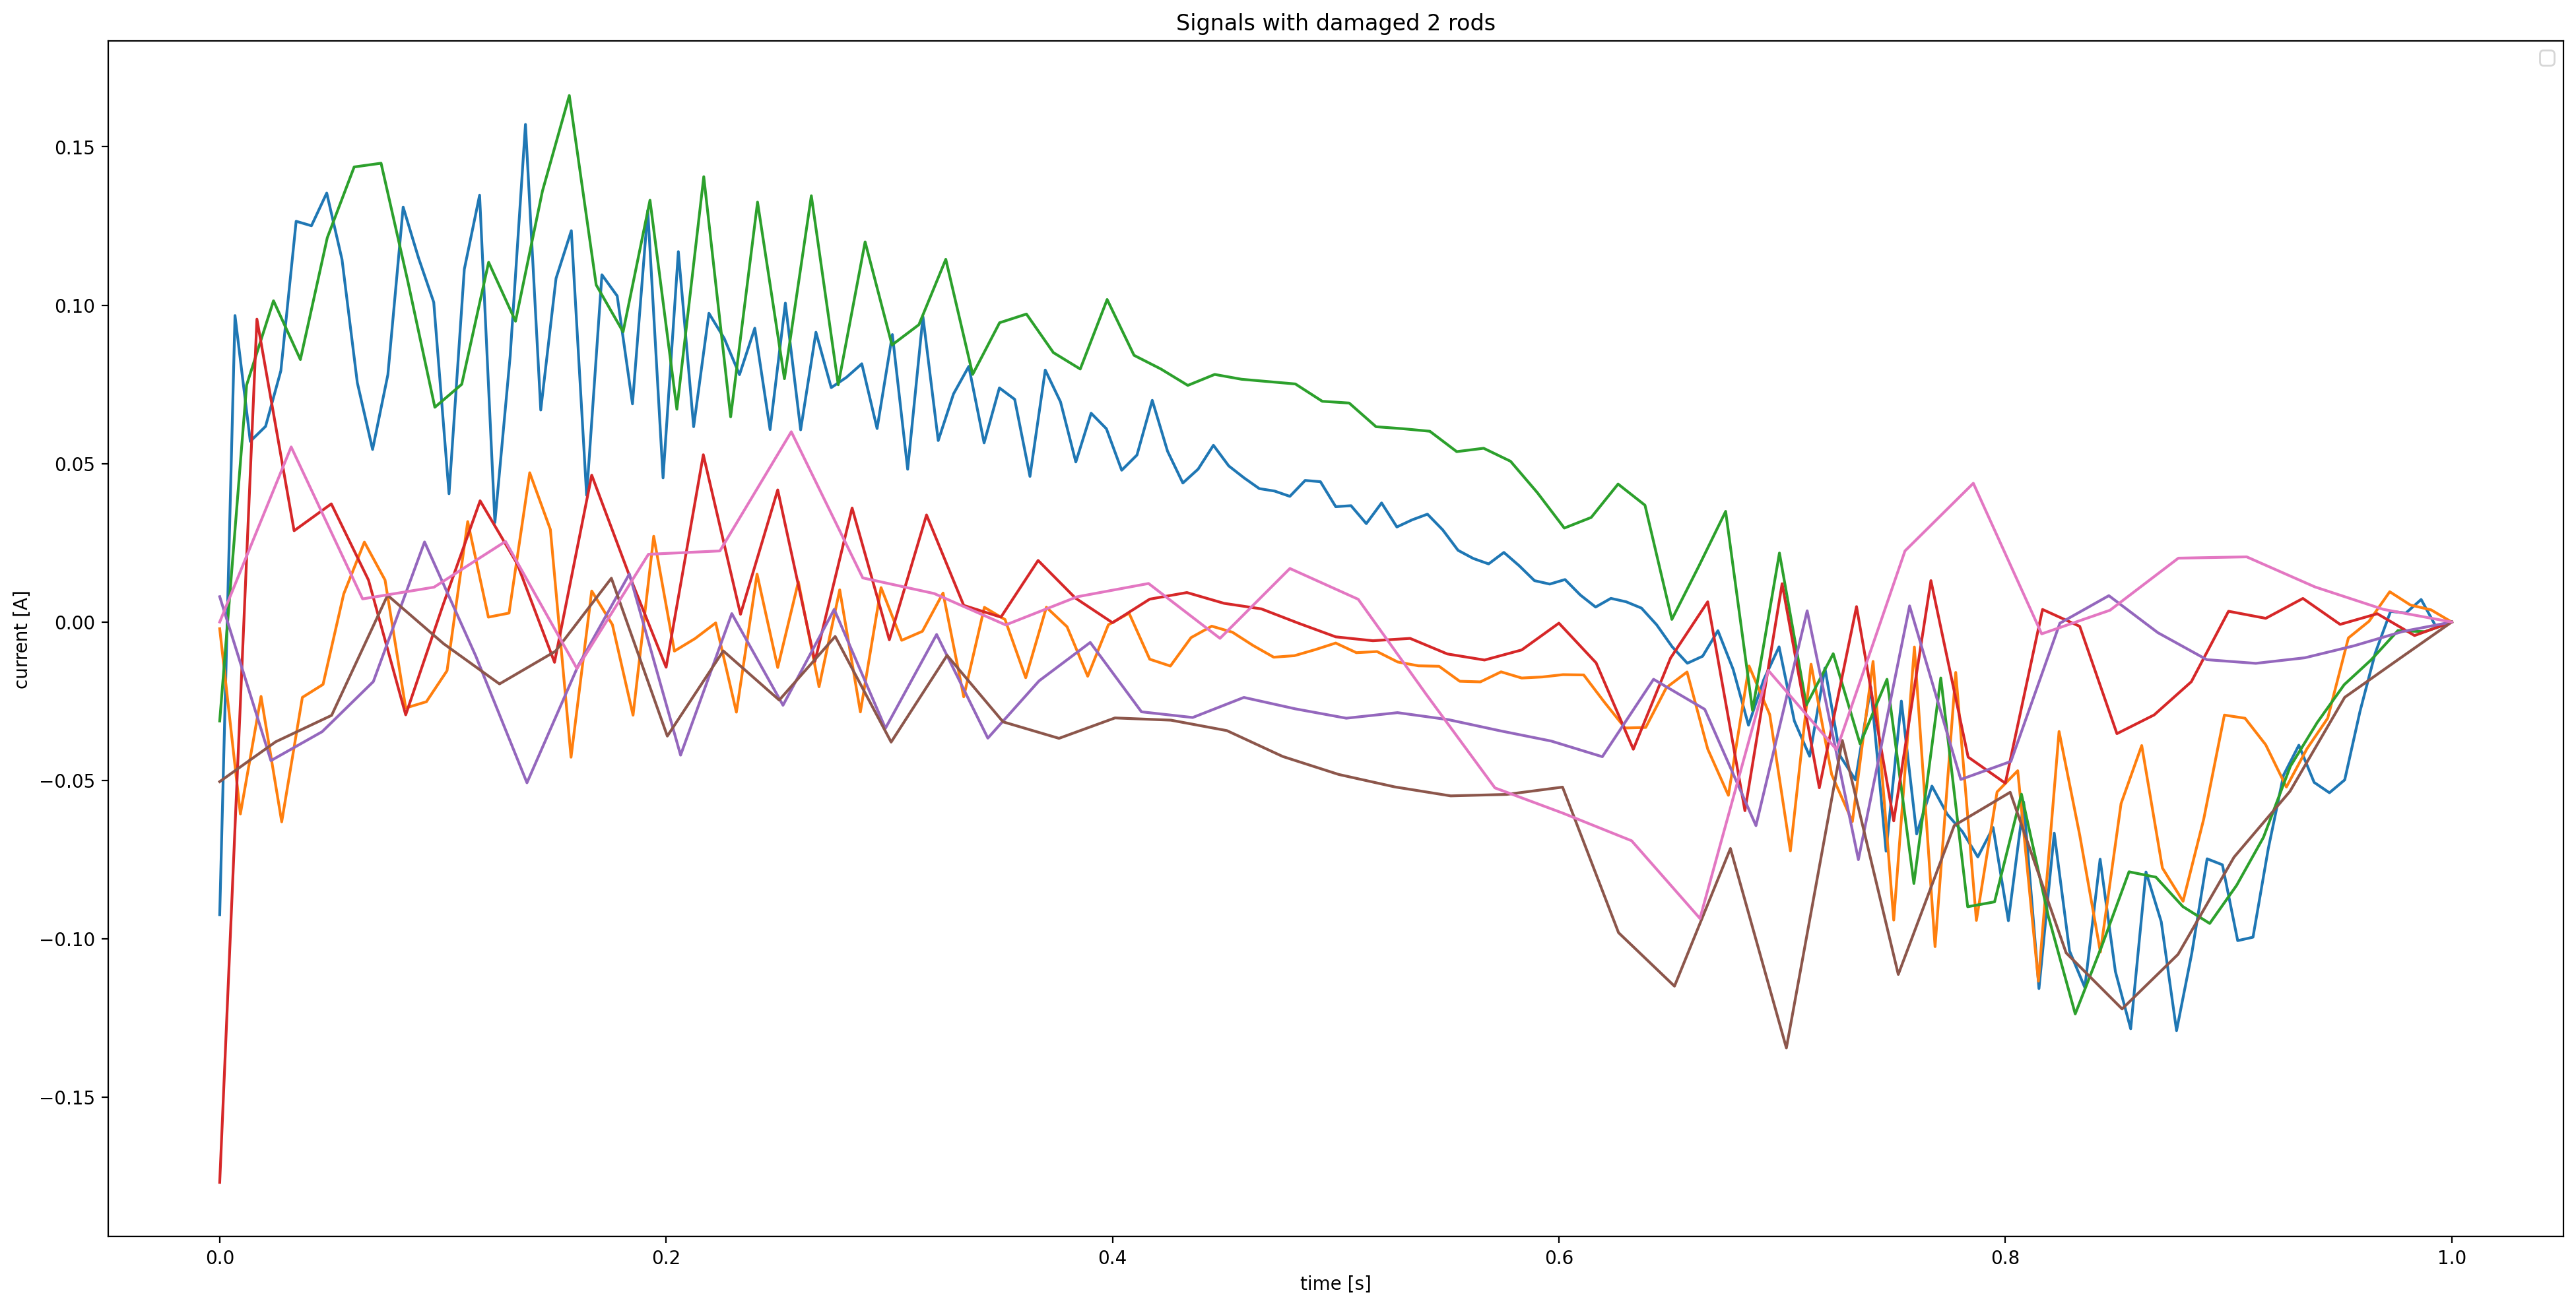

In [161]:
plt.figure(figsize=  (24,12))
plt.title('Signals with damaged 2 rods')
for index in range(len(signals_damaged_2_x)):
    plt.plot(signals_damaged_2_x[index],signals_damaged_2_y[index])
    plt.xlabel('time [s]')
    plt.ylabel('current [A]')
plt.legend()

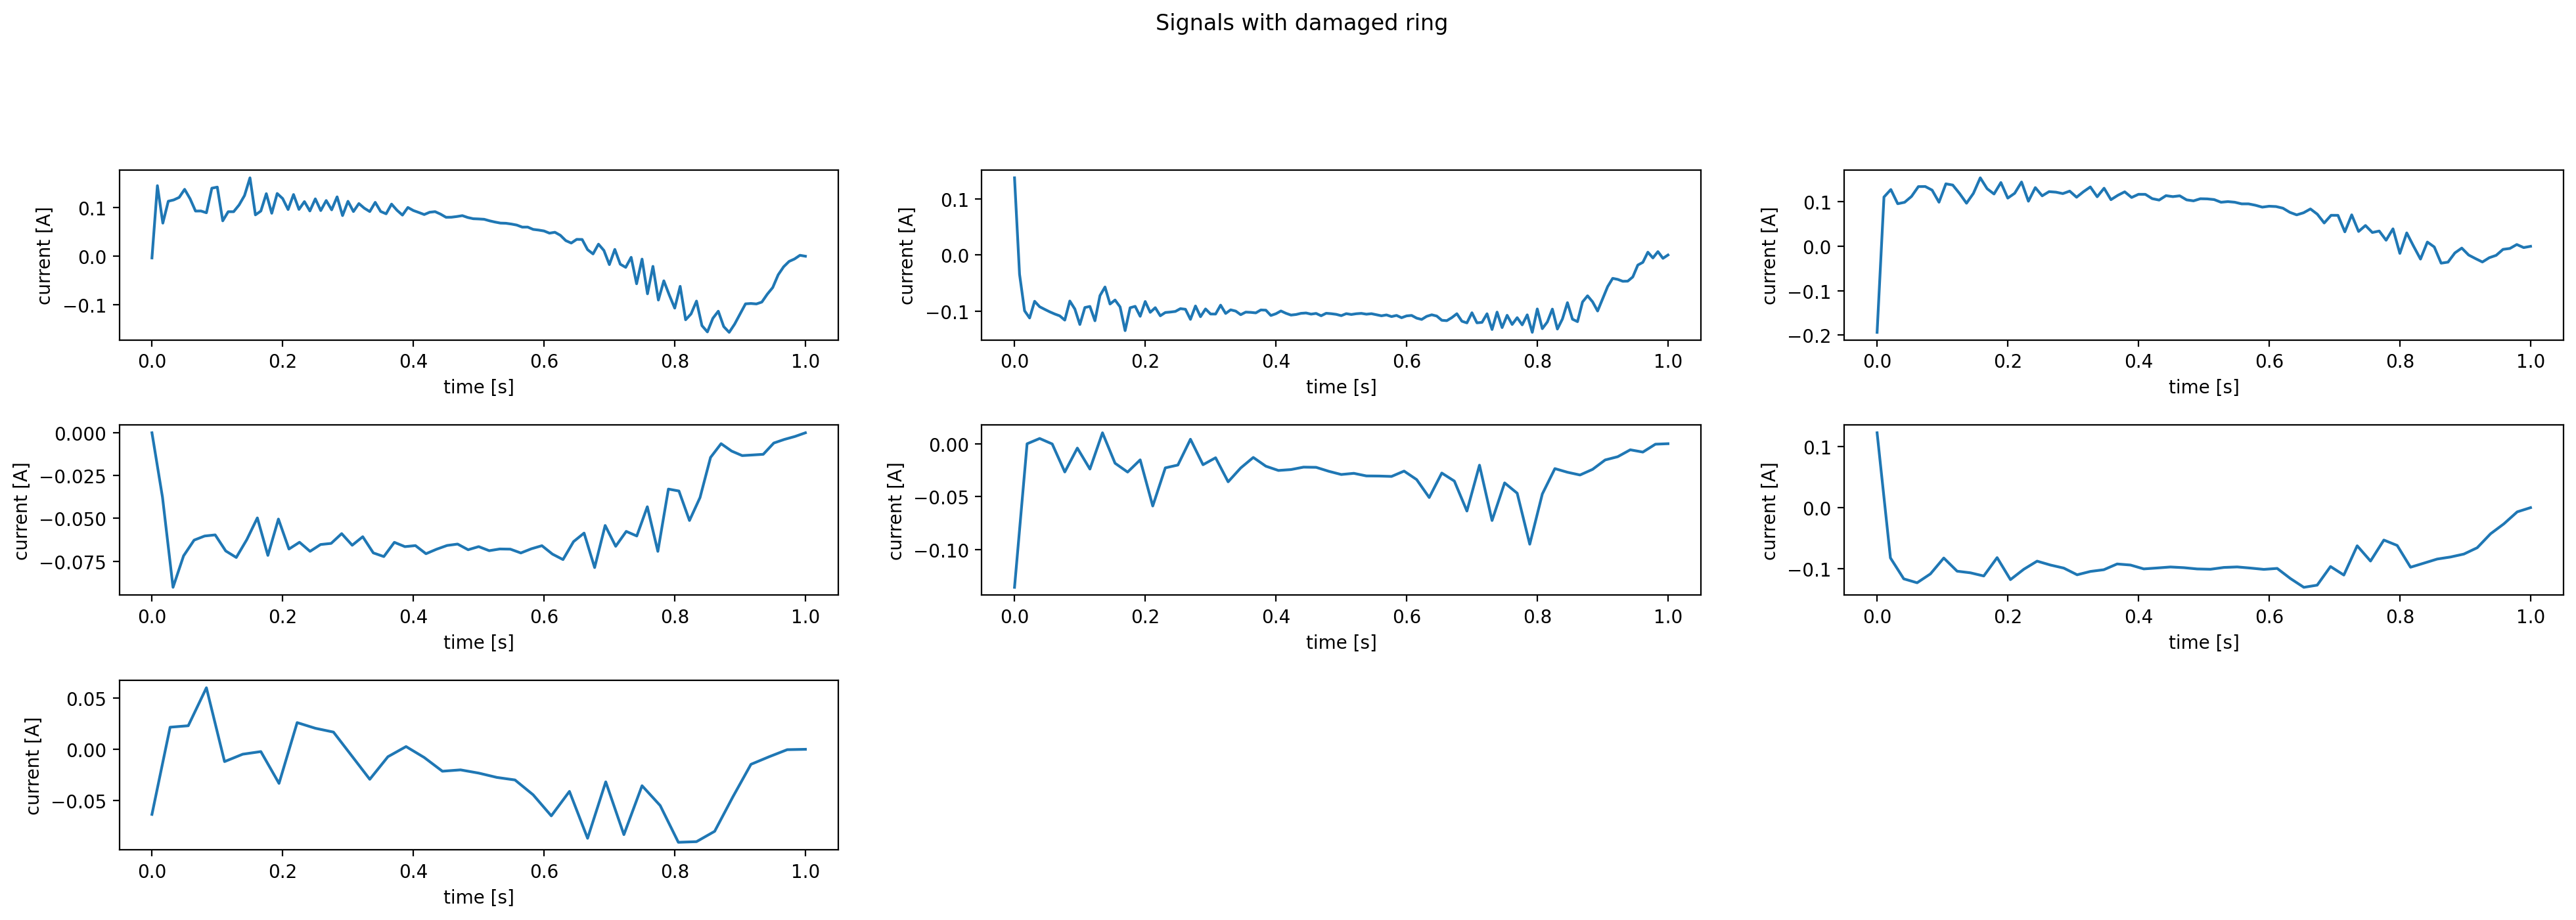

In [162]:
plt.figure(figsize=  (24,12))
plt.suptitle('Signals with damaged ring')
plt.subplots_adjust(hspace=0.5)
for index in range(len(signals_damaged_ring_x)):
    ax = plt.subplot(5,3,index +1)
    ax.plot(signals_damaged_ring_x[index],signals_damaged_ring_y[index])
    ax.set_xlabel('time [s]')
    ax.set_ylabel('current [A]')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


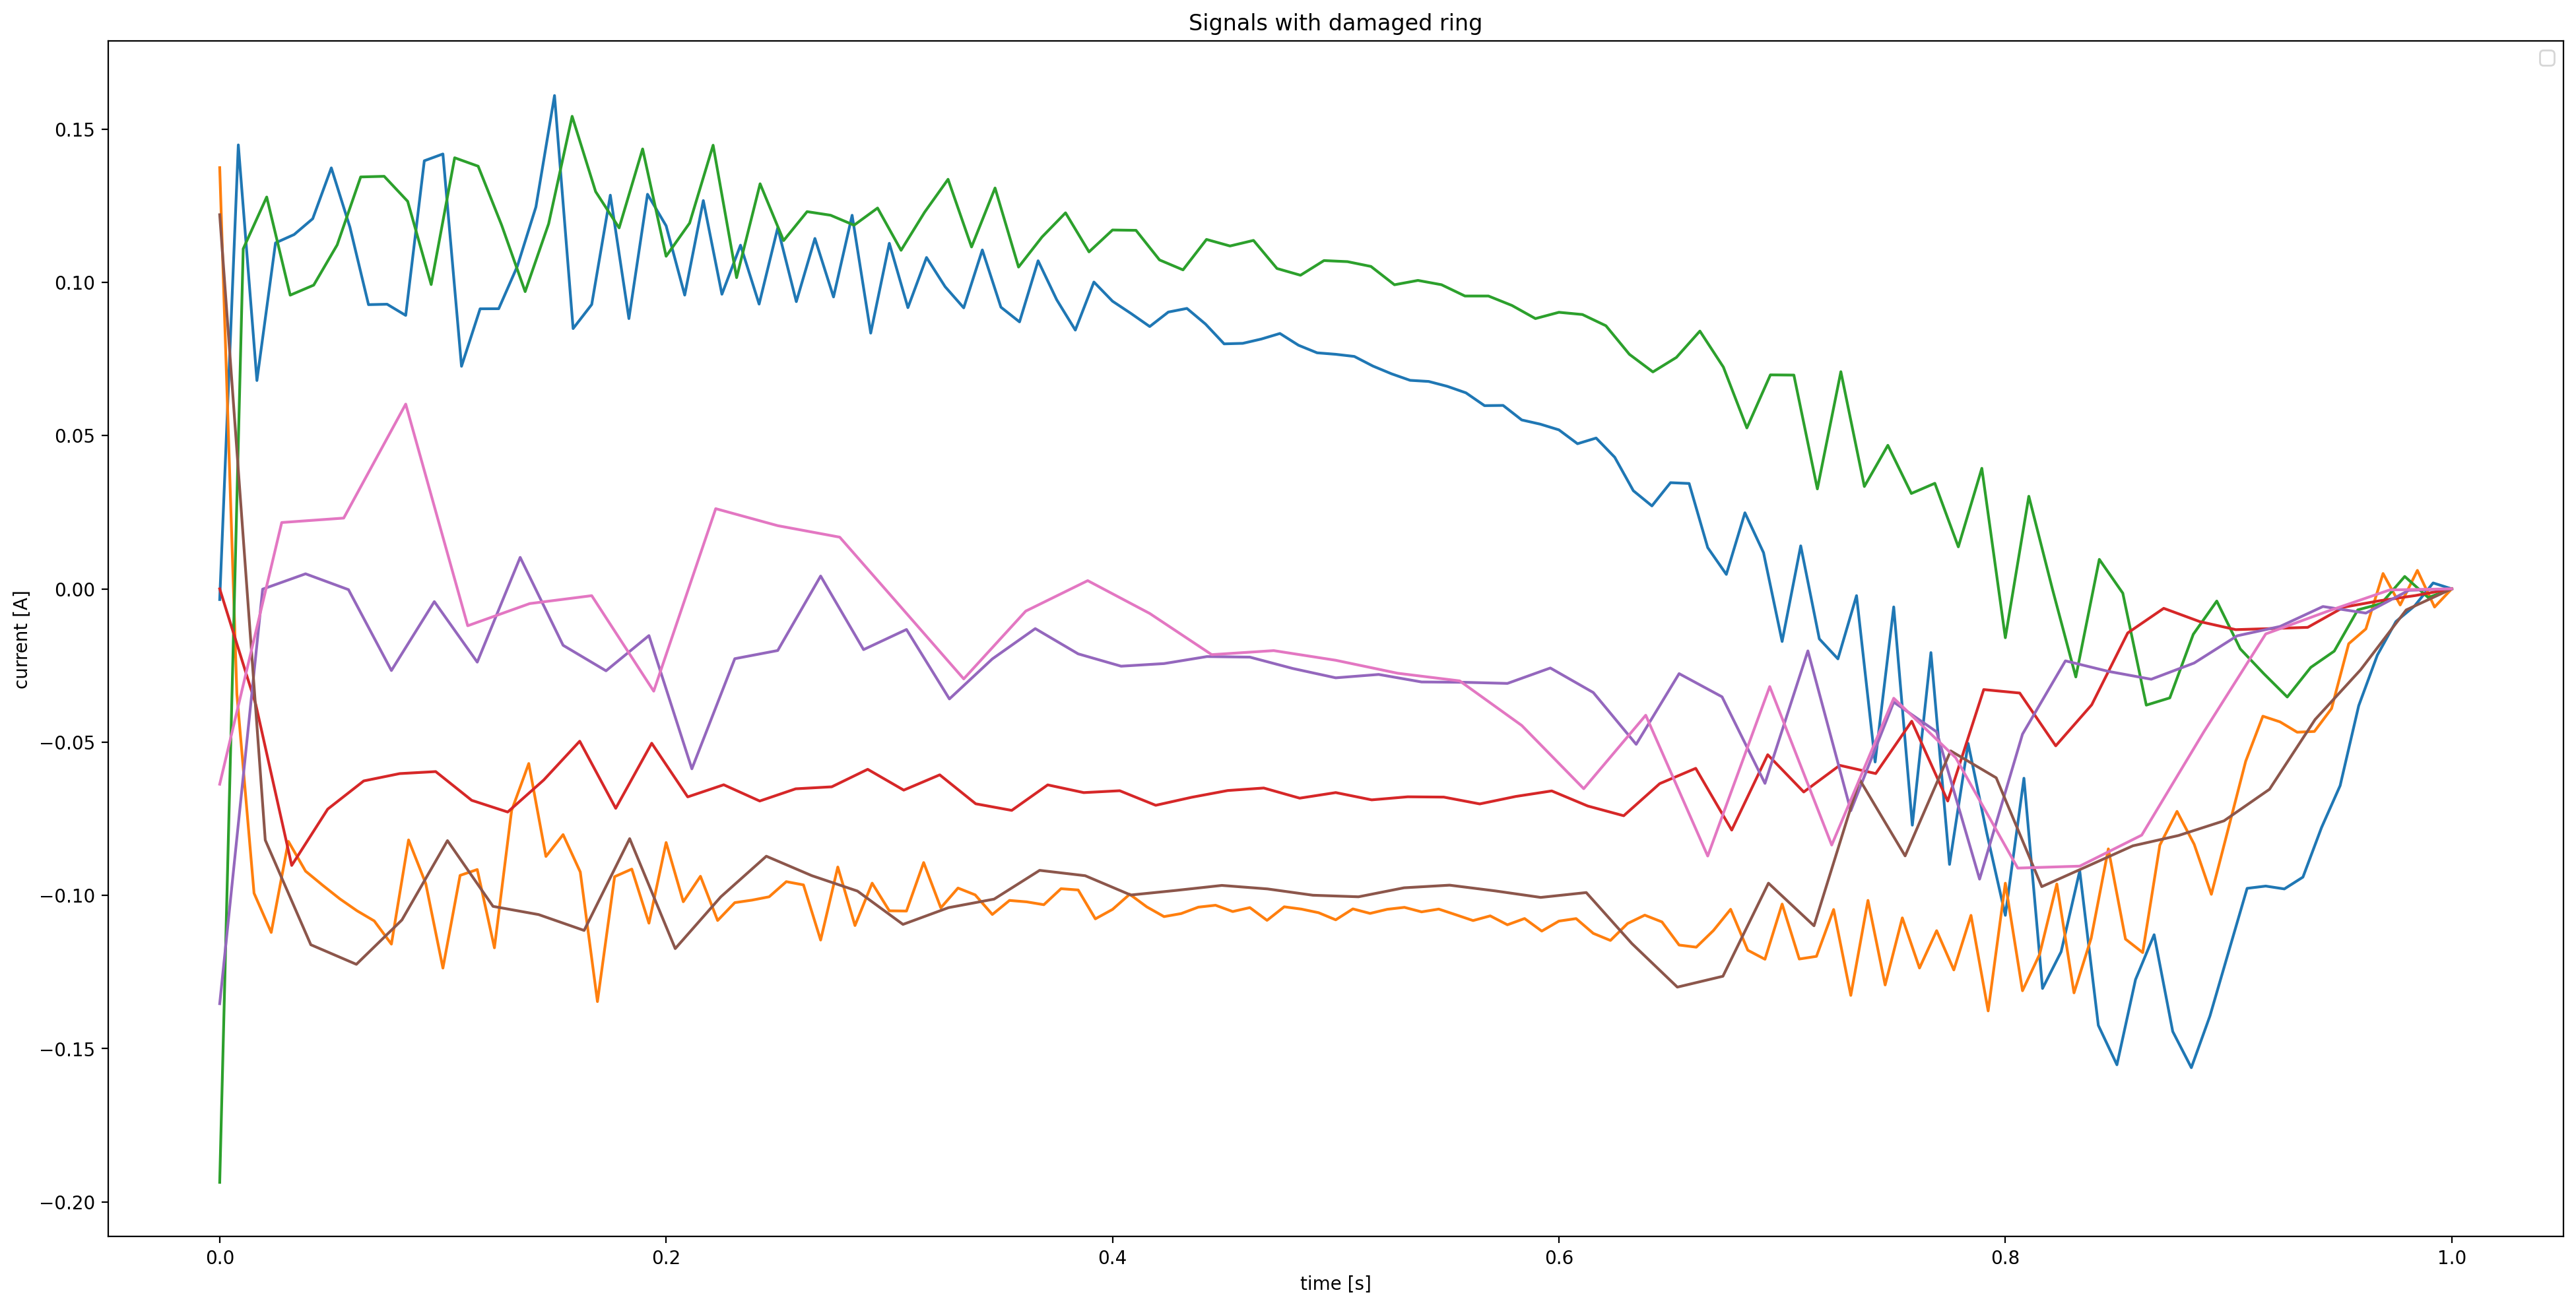

In [163]:
plt.figure(figsize=  (24,12))
plt.title('Signals with damaged ring')
for index in range(len(signals_damaged_ring_x)):
    plt.plot(signals_damaged_ring_x[index],signals_damaged_ring_y[index])
    plt.xlabel('time [s]')
    plt.ylabel('current [A]')
plt.legend()